# COSC 2779 Deep learning: Assignment 2


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

%cd /content/gdrive/My Drive/StanceDataset/

# Check current OS directory
!ls

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/StanceDataset
glove.twitter.100d.preloaded.txt  glove.twitter.27B.200d.txt
glove.twitter.200d.preloaded.txt  glove.twitter.27B.25d.txt
glove.twitter.25d.preloaded.txt   test.csv
GloVe_Twitter_25d.txt		  train.csv
glove.twitter.27B.100d.txt	  train_shuffled.csv


## Data Exploration & Analysis



### Data Retrieval

In [ ]:
# Import Essential dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import tensorflow as tf

In [ ]:
!pip install nltk

import nltk



In [ ]:
# Read train and test dataset.
with open('train_shuffled.csv','r',encoding='ISO-8859-1') as f:
    train_data = pd.read_csv(f)

with open('test.csv','r',encoding='ISO-8859-1') as y:
    test_data = pd.read_csv(y)
    
    
f.close()
y.close()

In [ ]:
train_data.head(20)

Unnamed: 0  ...  Sentiment
0            0  ...        neg
1            1  ...        neg
2            2  ...        neg
3            3  ...        neg
4            4  ...        neg
5            5  ...        neg
6            6  ...        neg
7            7  ...        neg
8            8  ...        neg
9            9  ...        neg
10          10  ...        neg
11          11  ...        neg
12          12  ...        neg
13          13  ...        neg
14          14  ...        neg
15          15  ...        neg
16          16  ...        neg
17          17  ...        neg
18          18  ...      other
19          19  ...        neg

[20 rows x 7 columns]

In [ ]:
test_data.head(20)
    

Tweet  ... Sentiment
0   He who exalts himself shall      be humbled; a...  ...       pos
1   RT @prayerbullets: I remove Nehushtan -previou...  ...     other
2   @Brainman365 @heidtjj @BenjaminLives I have so...  ...       pos
3   #God is utterly powerless without Human interv...  ...       neg
4   @David_Cameron   Miracles of #Multiculturalism...  ...       neg
5   This world needs a tight group hug. Tight enou...  ...       pos
6   Morality is not derived from religion, it prec...  ...       pos
7   A Godly husband  - knows you - trusts you - lo...  ...       pos
8   @SecularDutchess I'll be your huckleberry @Dea...  ...     other
9   #BIBLE = Big Irrelevant Book of Lies and Exagg...  ...       neg
10  If only dreams were real, now it's gone. #Sing...  ...       neg
11  Happy Independence Day to America and her beau...  ...       pos
12  Let my house be built by wisdom and become str...  ...       pos
13  These days, the cool kids are atheists.  #free...  ...       pos
14  Next time you hear someone say that our Foundi...  ...       neg
15  #ILoveIslamBecause and v should love Islam bec...  ...       pos
16  Be a sinner and sin strongly, but more strongl...  ...       pos
17  #God > My fears God > My insecurities God > My...  ...       pos
18  Mary, Queen of martyrs, pray for us. #Catholic...  ...       pos
19  America, like all of us, has both beauty and b...  ...       neg

[20 rows x 5 columns]

In [ ]:
train_data['Tweet']

0       IF FEMINISTS WERE HONEST   "Tell me the truth ...
1       Watching teen mom and watching Farrah be a bit...
2       @AssaadRazzouk @TheEarthNetwork @wynnandreid U...
3       WOW.  Why is gay marriage legal but LESBIAN ma...
4       RT @ProLifeYouth: "It seems to me clear as day...
                              ...                        
2909    @FoxNews we just have to hang in there long en...
2910    #BeautyRant 7-Why have I been taught to hate m...
2911    We are thrilled to announce that we will be op...
2912     There use to be a glacier on the equator. #SemST
2913    When did people without taste buds decide to b...
Name: Tweet, Length: 2914, dtype: object

In [ ]:

# Number of Stance
train_data['Stance'].unique()


array(['AGAINST', 'FAVOR', 'NONE'], dtype=object)

In [ ]:

# Number of Target Topic
train_data['Target'].unique()

array(['Feminist Movement', 'Legalization of Abortion',
       'Climate Change is a Real Concern', 'Atheism', 'Hillary Clinton'],
      dtype=object)

### Observe Stance Distribution for each target topic

In [ ]:
import seaborn as sns

def plotTopicDist(TARGET_TOPIC):
  index = 0

  counter = [0,0,0]


  for topic in train_data['Target']:
    if topic == TARGET_TOPIC:
      y = 0
      for stance in train_data['Stance'].unique():
        if stance == train_data['Stance'][index]:
          counter[y] += 1
        y+=1


    index+=1

  df = pd.DataFrame([{'x':'AGAINST','y':counter[0]},{'x':'FAVOUR','y':counter[1]},{'x':'NONE','y':counter[2]}])
  sns.barplot(x = 'x',
              y = 'y',
              data = df)

  plt.title("TARGET TOPIC: "+str(TARGET_TOPIC))

  plt.show()

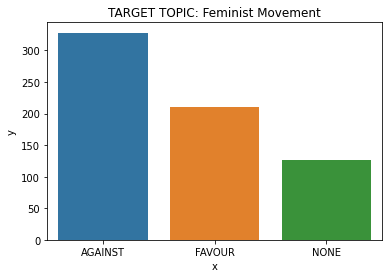

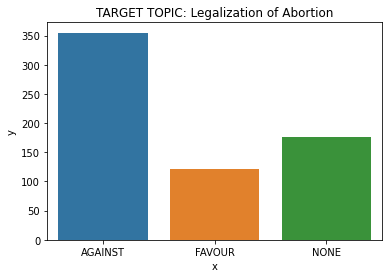

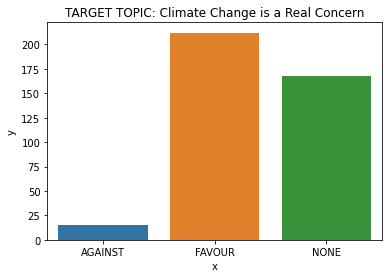

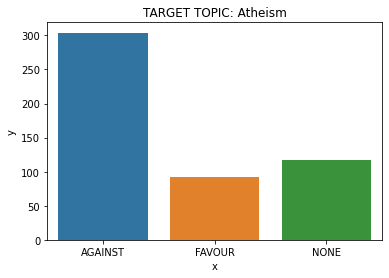

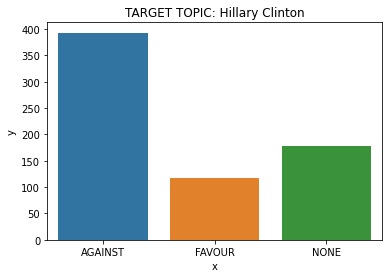

In [ ]:
# Observe all target topic distributions
for topic in train_data['Target'].unique():
  plotTopicDist(topic)

### Visualizations of word distribution in Tweets


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Word Cloud (Train Data)

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

def visualizeWordCloud(data):
  tweet_All = " ".join(review for review in data)

  plt.figure(figsize  = (30,30))
  # Create and generate a word cloud image:
  wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

  # Display the generated image:
  plt.imshow(wordcloud_ALL, interpolation='bilinear')
  plt.title('All Tweets', fontsize=30)
  plt.axis('off')


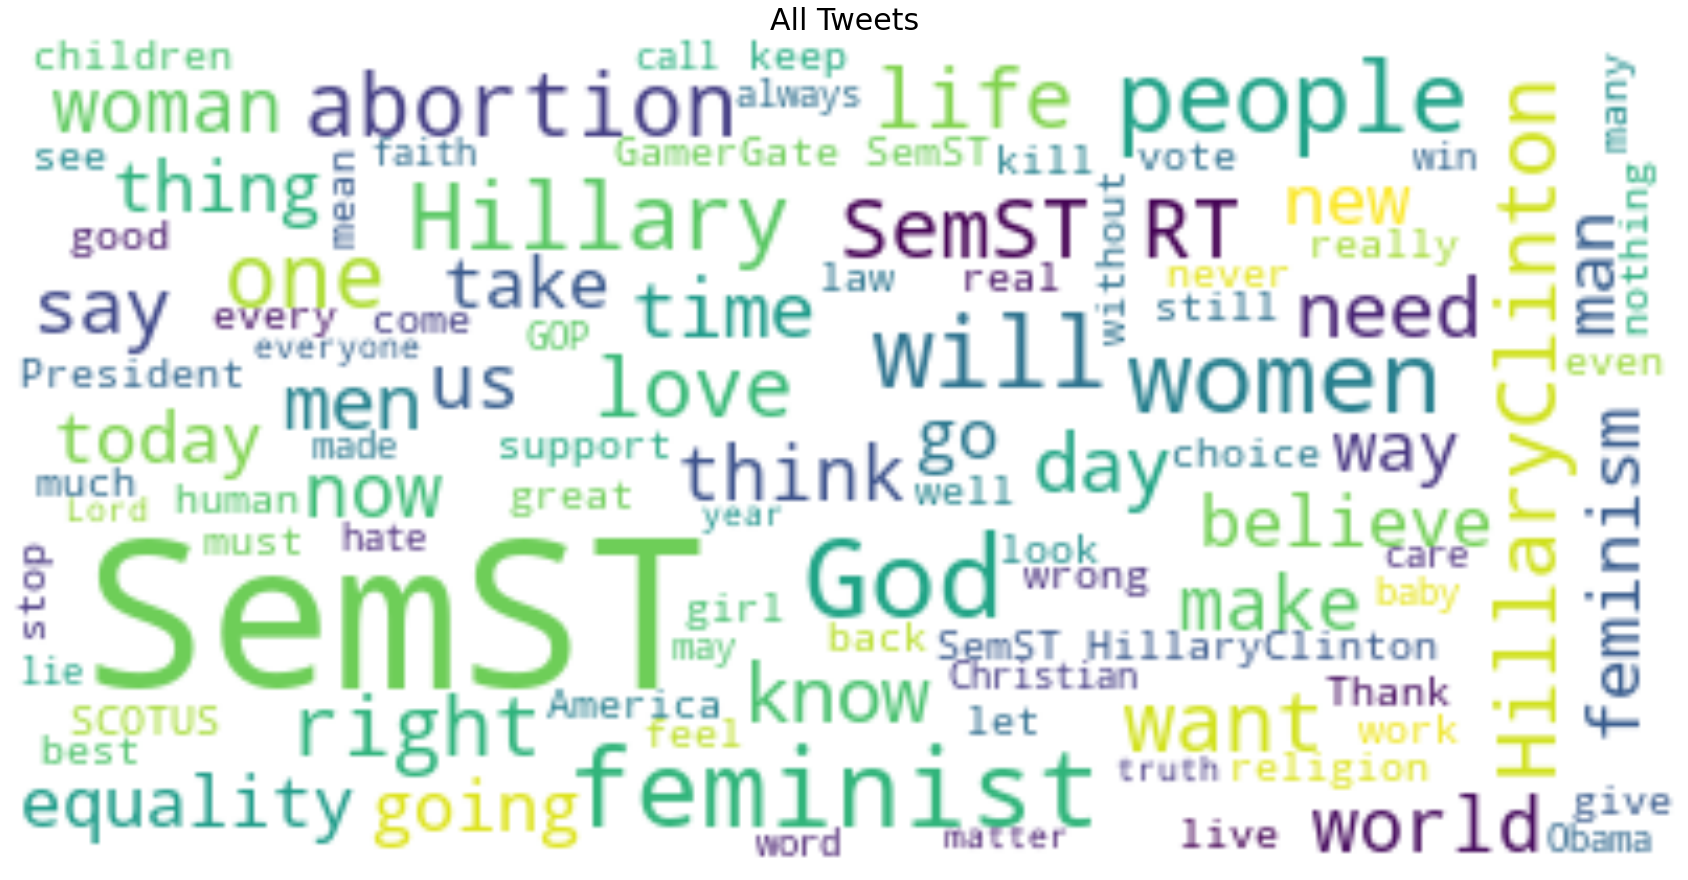

In [ ]:
visualizeWordCloud(train_data['Tweet'])

### Word Cloud (Test Data)

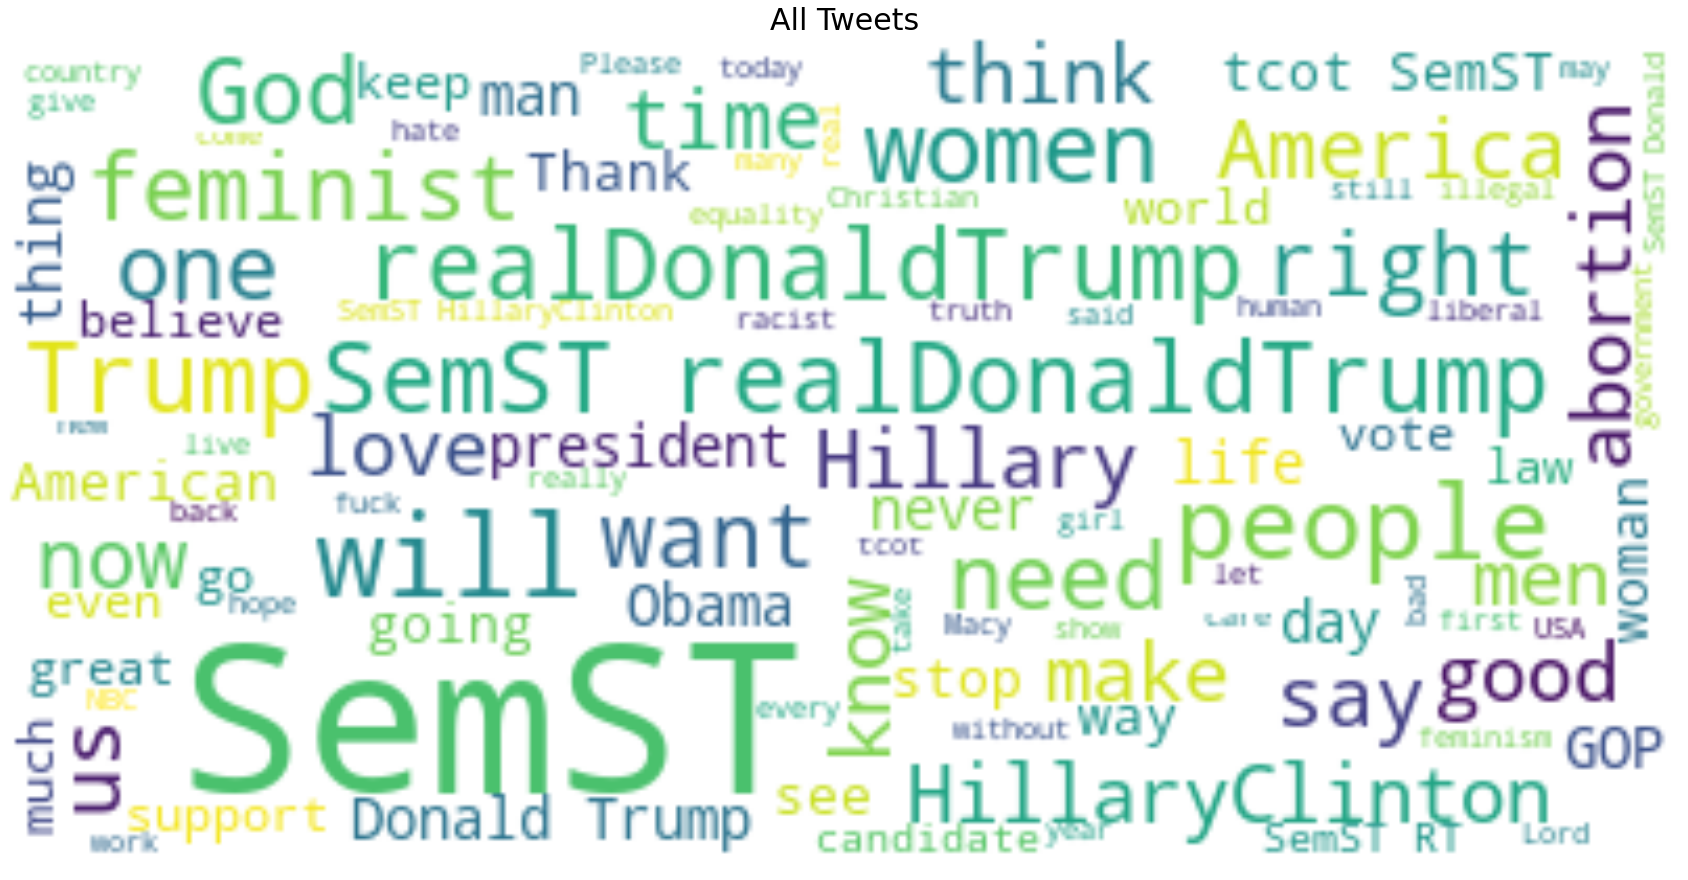

In [ ]:
visualizeWordCloud(test_data['Tweet'])

### Topic Specific WordCloud

**Hillary Clinton**

In [ ]:
def visualizeTopicWordCloud(TARGET_TOPIC):
  topicBool = train_data['Target'] == TARGET_TOPIC
  topic = train_data[topicBool]

  visualizeWordCloud(topic['Tweet'])

**Hillary Clinton**

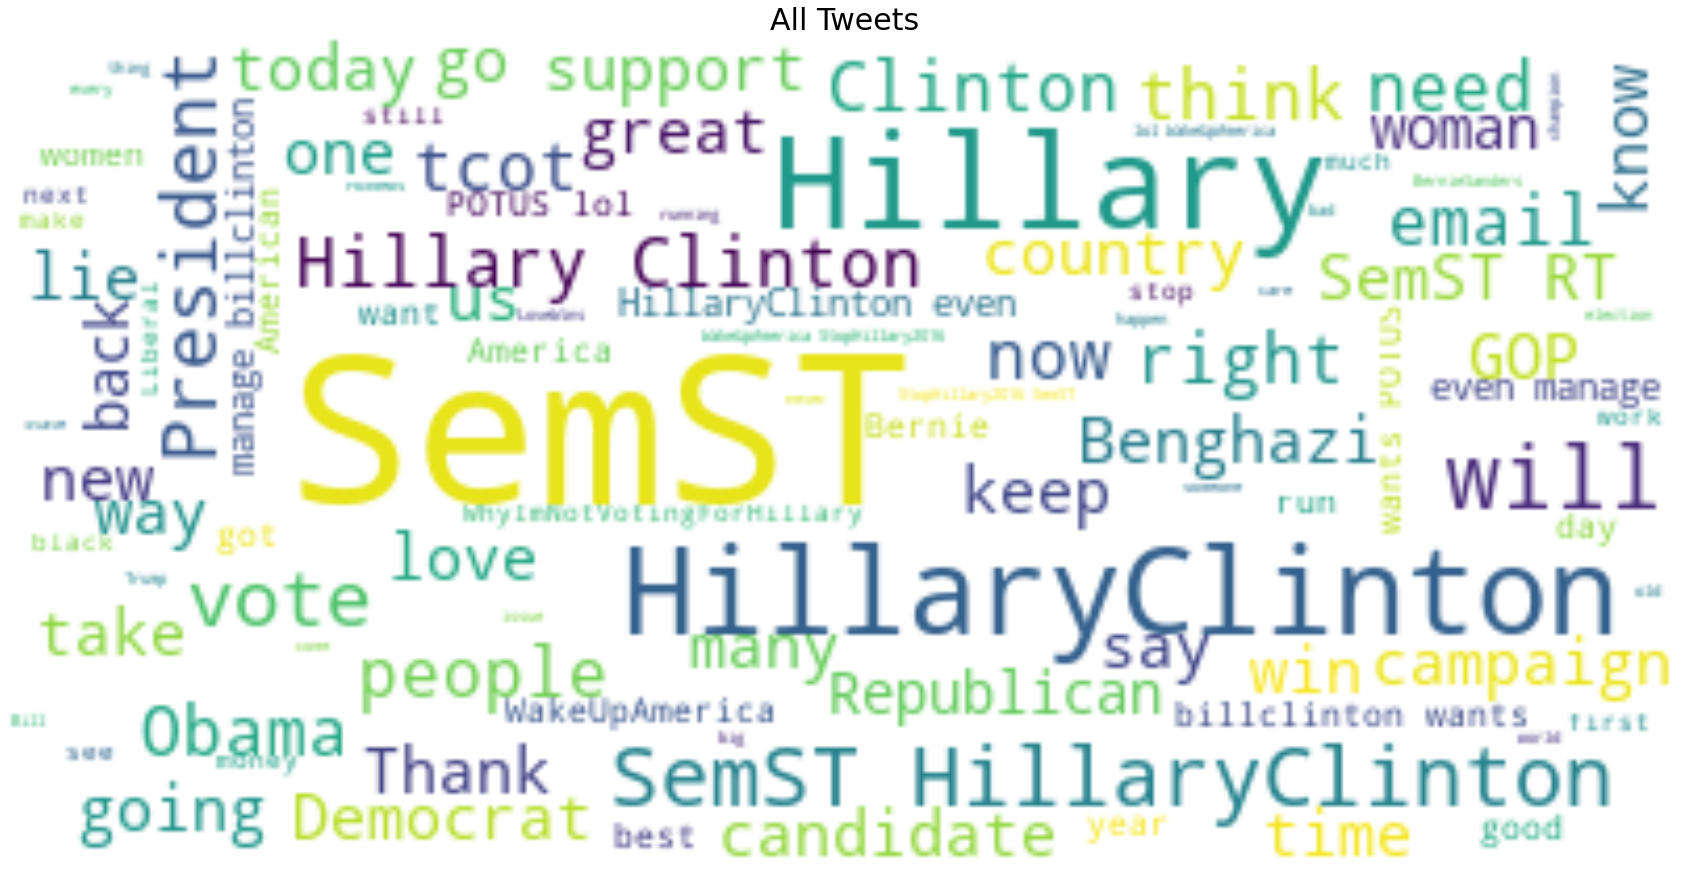

In [ ]:
visualizeTopicWordCloud("Hillary Clinton")

**Legalization of Abortion**

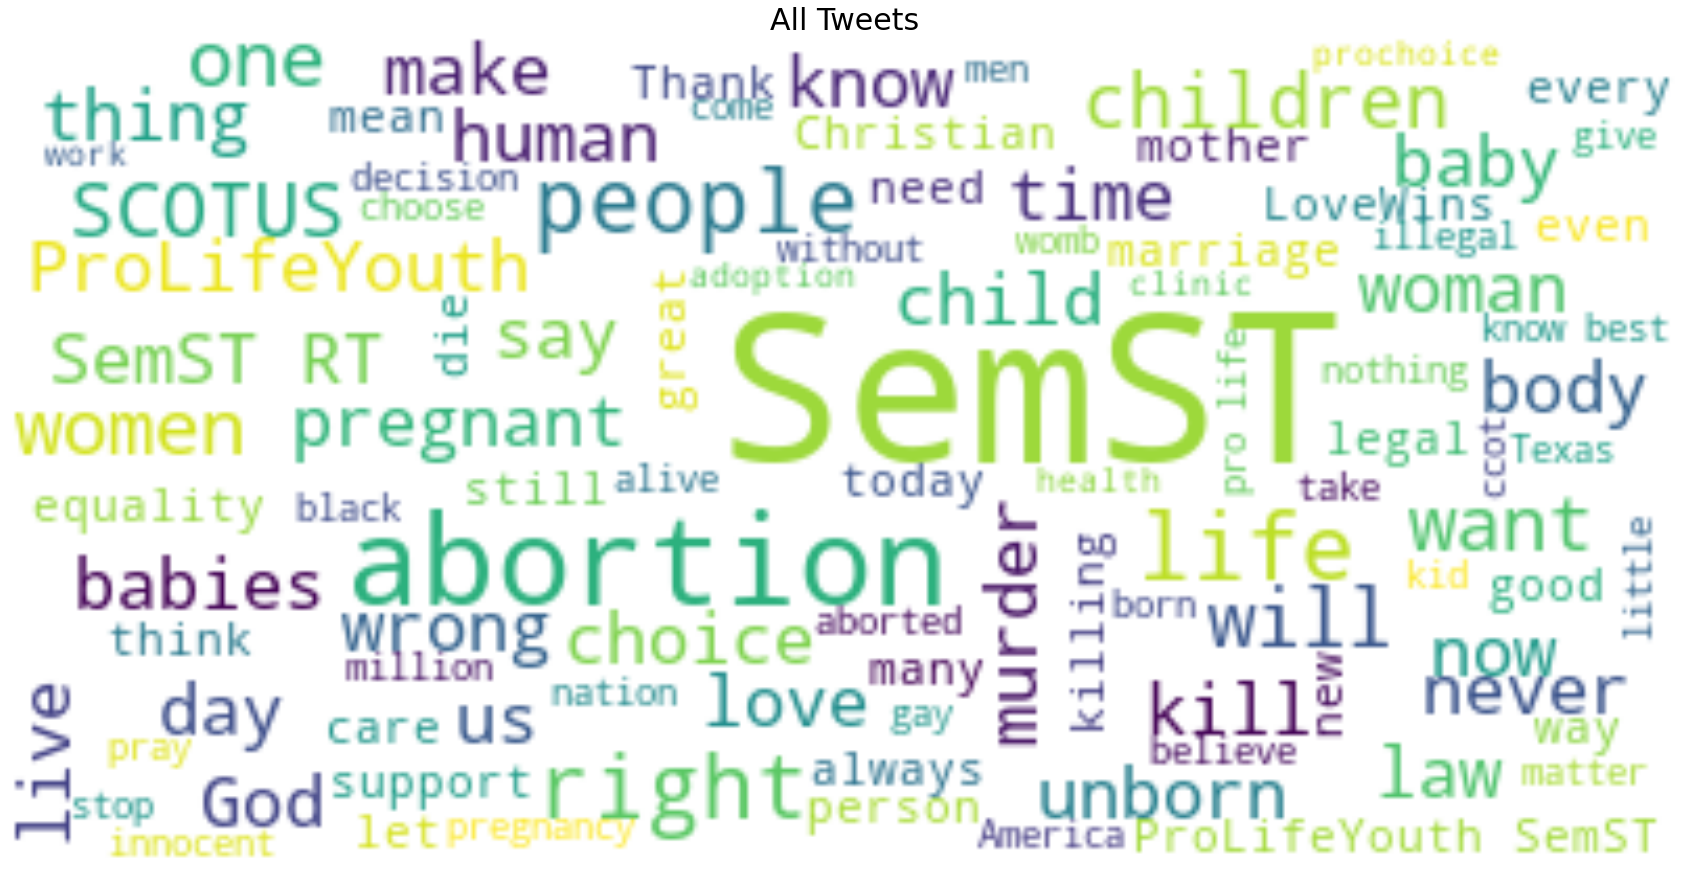

In [ ]:
visualizeTopicWordCloud('Legalization of Abortion')

**Atheism**

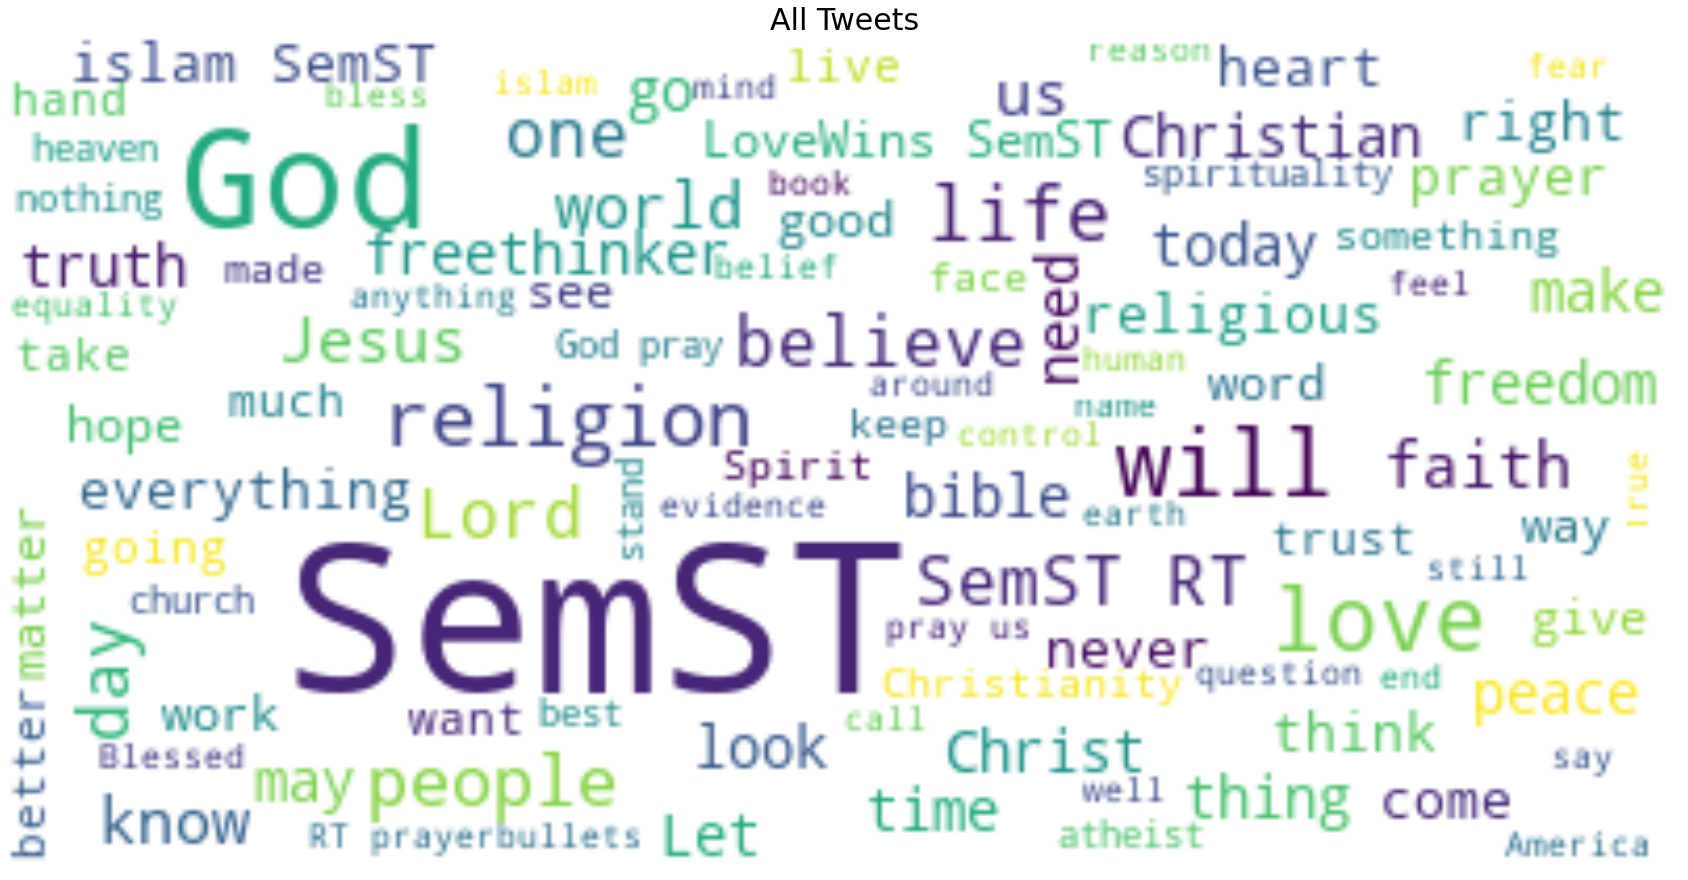

In [ ]:
visualizeTopicWordCloud('Atheism')

**Climate Change is a Real Concern**

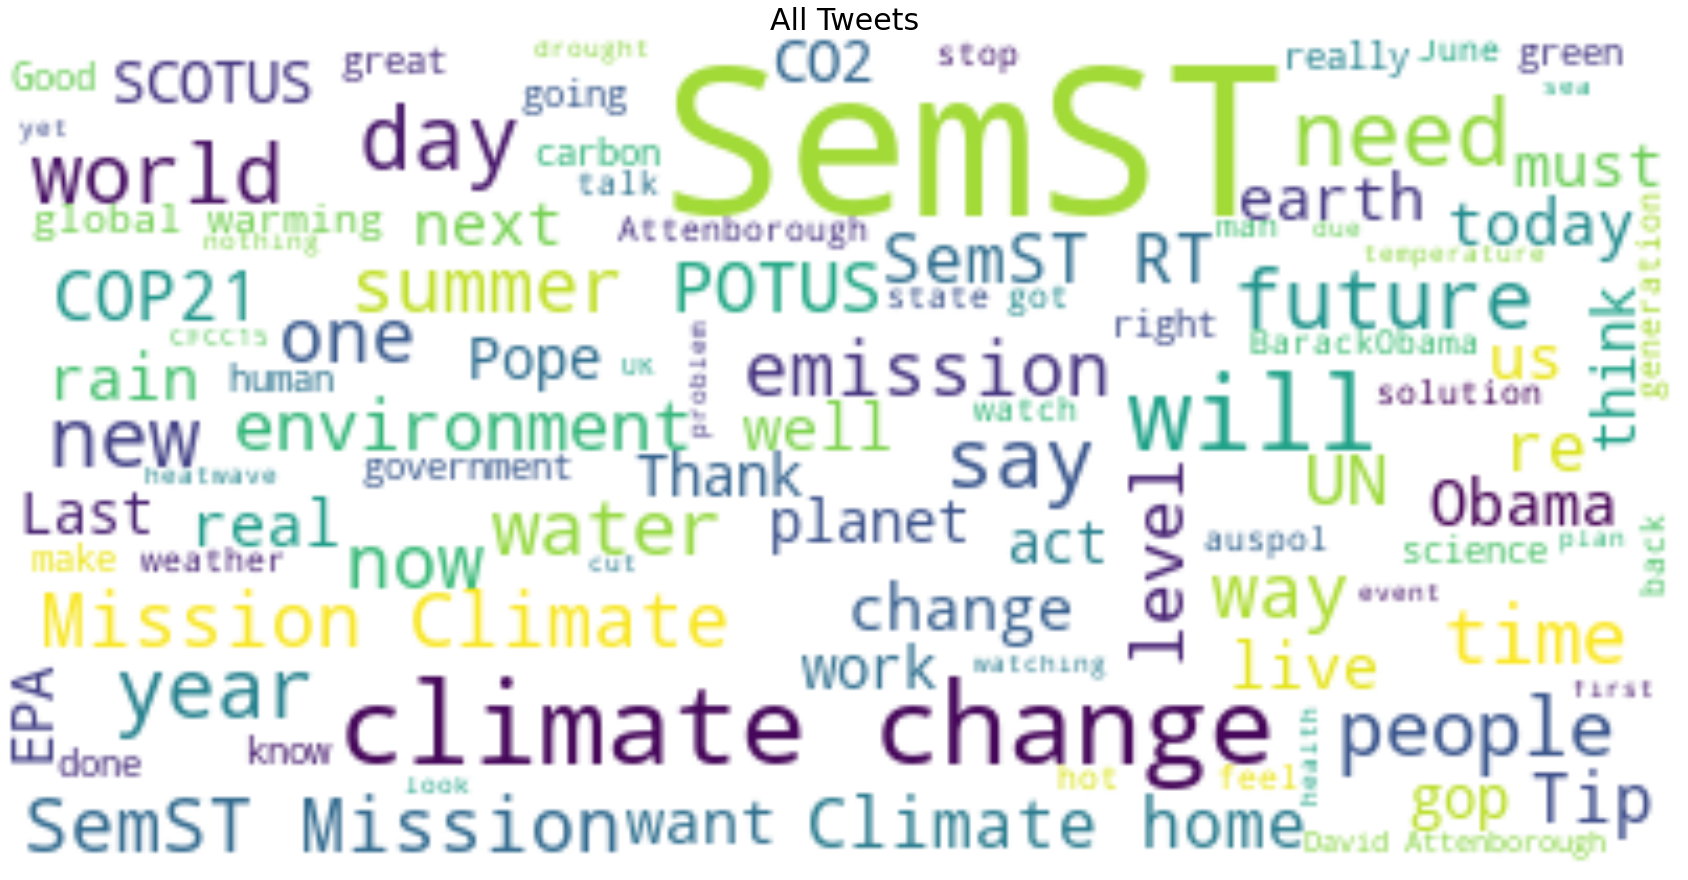

In [ ]:
visualizeTopicWordCloud('Climate Change is a Real Concern')

**Feminist Movement**

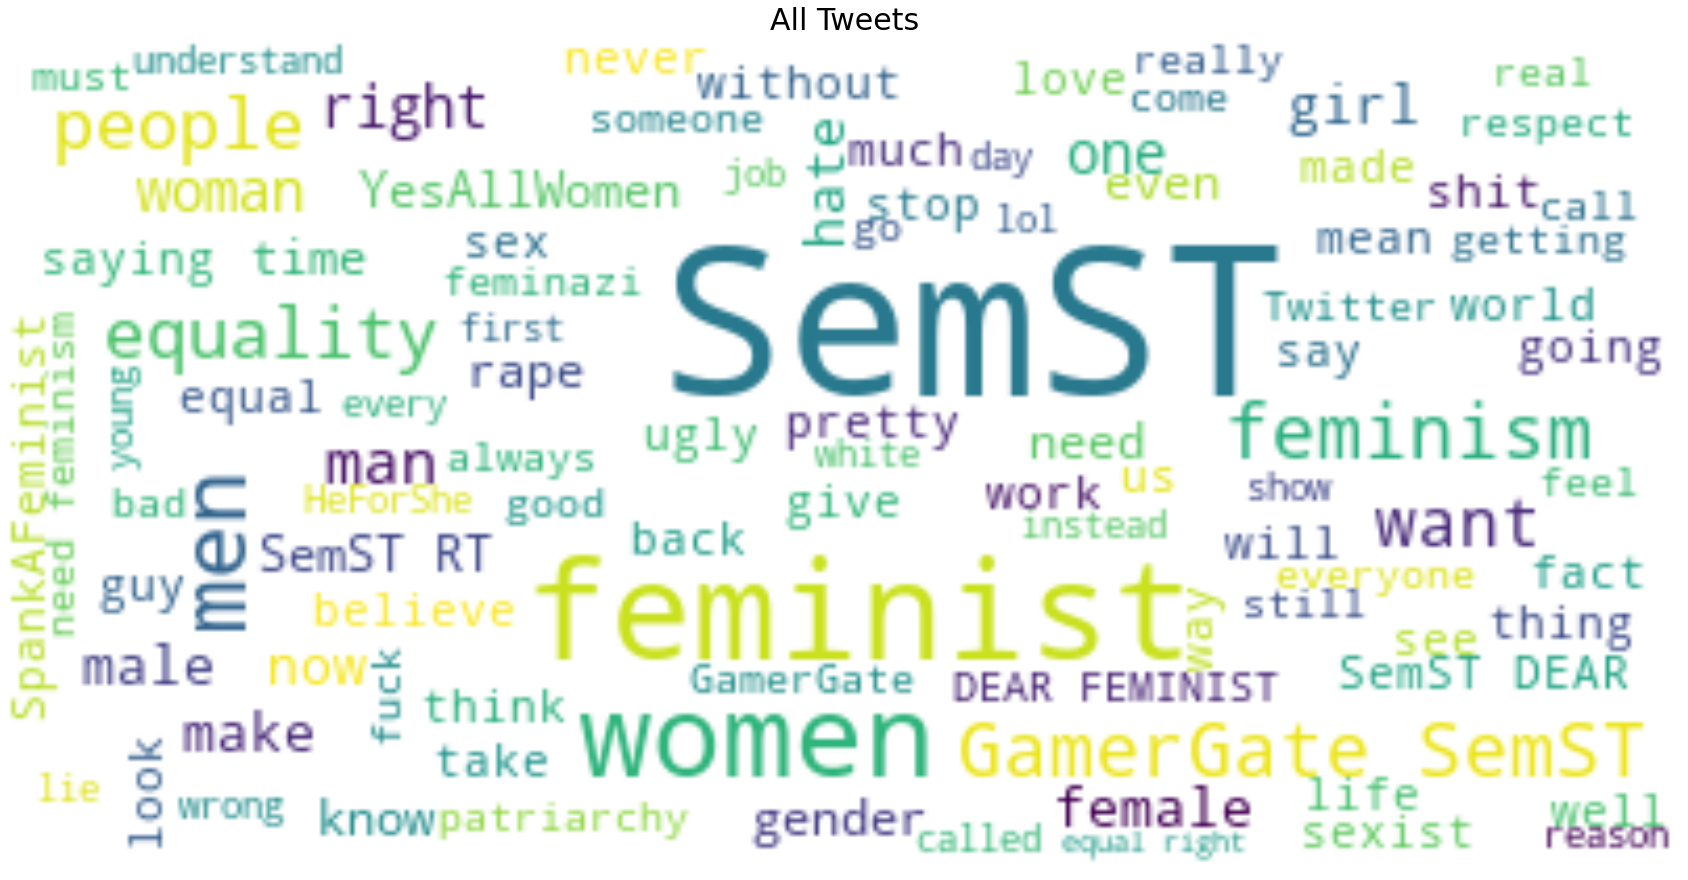

In [ ]:
visualizeTopicWordCloud('Feminist Movement')

## Data Preparation

### Preparing Input & Target (x/y) values 

In [ ]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

tweet_lines = list()
lines = train_data['Tweet'].values.tolist()

lines_length = list()
for line in lines:
    # Remove Punctuation except @ and #
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)  
   
    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # Append lines to calculate max length
    lines_length.append(len(tokens))

    # Append pre-processed tokens
    tweet_lines.append(tokens)

tweet_lines[:2]

max_length=max(lines_length)

max_length


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


33

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweet_lines)
sequences = tokenizer_obj.texts_to_sequences(tweet_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

tweet_lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [ ]:
tweet_lines_pad[:5]

array([[  25,   75,  134,  528,  285,   35,    2,  227,   38,   89,  386,
           8,  311,   23,   35,  104,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 387, 1237,  529,    9,  387, 3399,   15,    4,  579,  329,   35,
         121,   10,   61,   16,  124,   63,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3400, 3401, 3402,  286,    6, 1023,  530,    3, 3403,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 484,   65,    6,  242,  141,  312,   38, 2100,  141,  243,   14,
          32,    2,  367,  150,  889,   27,   70,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  53,  163,   13,  580,    3,   35,  773,   33, 3404,   16,   61,
          87,   15,    4,  531, 34

In [ ]:
train_data['Target'][:5]

0                   Feminist Movement
1            Legalization of Abortion
2    Climate Change is a Real Concern
3                   Feminist Movement
4            Legalization of Abortion
Name: Target, dtype: object

In [ ]:

target_lines = list()
lines = train_data['Target'].values.tolist()

target_lines_length = list()
for line in lines:
    # tokenize the text
    tokens = word_tokenize(line)

    target_lines_length.append(len(tokens))

    target_lines.append(tokens)

In [ ]:
target_max_length=max(target_lines_length)

target_max_length

6

In [ ]:

sequences = tokenizer_obj.texts_to_sequences(target_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

target_lines_pad = pad_sequences(sequences, maxlen=target_max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [ ]:
target_lines_pad[:5]

array([[  76,  930,    0,    0,    0,    0],
       [8784,    5,   61,    0,    0,    0],
       [ 119,  108,    6,    4,  184, 6153],
       [  76,  930,    0,    0,    0,    0],
       [8784,    5,   61,    0,    0,    0]], dtype=int32)

In [ ]:
print("Tweet Lines Shape", tweet_lines_pad.shape)
print("Target Lines Shape", target_lines_pad.shape)


Tweet Lines Shape (2914, 33)
Target Lines Shape (2914, 6)


In [ ]:
from keras import utils as np_utils

stance_list = []

for value in train_data['Stance']:
  if value == "FAVOR":
    stance_list.append(0)
  elif value == "NONE":
    stance_list.append(1)
  elif value == "AGAINST":
    stance_list.append(2)


stance_list = np_utils.to_categorical(stance_list)

In [ ]:

print("Tweet x Shape", tweet_lines_pad.shape )
print("Target x Shape", target_lines_pad.shape)
print("Stance y Shape", stance_list.shape)

Tweet x Shape (2914, 33)
Target x Shape (2914, 6)
Stance y Shape (2914, 3)


### Preparing Test Dataset

In [ ]:
# Removing Donald Trump Target Topic
test_data = test_data[test_data['Target'] != "Donald Trump"]

In [ ]:

test_tweet_lines = list()
lines = test_data['Tweet'].values.tolist()

lines_length = list()
for line in lines:
    # Remove Punctuation except @ and #
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)  
   
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    lines_length.append(len(tokens))

    test_tweet_lines.append(tokens)

In [ ]:
sequences = tokenizer_obj.texts_to_sequences(test_tweet_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

test_tweet_lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [ ]:
# Check unique Target values for test data
test_data['Target'].unique()

array(['Atheism', 'Climate Change is a Real Concern', 'Feminist Movement',
       'Hillary Clinton', 'Legalization of Abortion'], dtype=object)

In [ ]:
test_target_lines = list()
lines = test_data['Target'].values.tolist()

lines_length = list()
for line in lines:
    # Remove Punctuation except @ and #
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)  
   
    # convert to lower case
    tokens = [w.lower() for w in tokens]

    lines_length.append(len(tokens))

    test_target_lines.append(tokens)

In [ ]:
sequences = tokenizer_obj.texts_to_sequences(test_target_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

test_target_lines_pad = pad_sequences(sequences, maxlen=target_max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [ ]:
test_stance_list = []

for value in test_data['Stance']:
  if value == "FAVOR":
    test_stance_list.append(0)
  elif value == "NONE":
    test_stance_list.append(1)
  elif value == "AGAINST":
    test_stance_list.append(2)

test_stance_list = np_utils.to_categorical(test_stance_list)

In [ ]:
print("Test Tweets Shape", test_tweet_lines_pad.shape)
print("Test Targets Shape",test_target_lines_pad.shape)
print("Test Stance Shape",test_stance_list.shape)

Test Tweets Shape (1249, 33)
Test Targets Shape (1249, 6)
Test Stance Shape (1249, 3)


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
    
def getTestAccuracy(model):
    y_pred = model.predict([ test_tweet_lines_pad, test_target_lines_pad])
    
    y_pred_max = np.argmax(y_pred, axis=1)
    test_stance_list_max= np.argmax(test_stance_list, axis=1)

    return str("{:.2f}".format(accuracy_score(test_stance_list_max, y_pred_max) * 100))+"%"

In [ ]:
def getF1Score(model):
    y_pred = model.predict([ test_tweet_lines_pad, test_target_lines_pad])
    
    y_pred_max = np.argmax(y_pred, axis=1)
    test_stance_list_max= np.argmax(test_stance_list, axis=1)

    return str("{:.2f}".format(f1_score(test_stance_list_max, y_pred_max, average="macro") * 100))+"%"

In [ ]:
import seaborn as sns 

def getPredictionBarPlot(model, target):
  y_pred = model.predict([ test_tweet_lines_pad, test_target_lines_pad])
    
  y_pred_max = np.argmax(y_pred, axis=1)
  test_stance_list_max= np.argmax(test_stance_list, axis=1)

  index = 0
  rows_list = []

  counter = [0,0,0,0,0,0]

  for val in test_data["Target"]:
    if val == target:
      if y_pred_max[index] == 0:
        counter[0]+= 1
      elif y_pred_max[index] == 1:
        counter[1] += 1
      elif y_pred_max[index] == 2:
        counter[2] += 1
        
      if test_stance_list_max[index] == 0:
        counter[3] += 1
      elif test_stance_list_max[index] == 1:
        counter[4] += 1
      elif test_stance_list_max[index] == 2:
        counter[5] += 1
  
    index += 1

  rows_list.append({"type": "actual", "class": "favor", "count": counter[0]})
  rows_list.append({"type": "actual", "class": "neutral", "count": counter[1]})
  rows_list.append({"type": "actual", "class": "against", "count": counter[2]})
  rows_list.append({"type": "predicted", "class": "favor", "count": counter[3]})
  rows_list.append({"type": "predicted", "class": "neutral", "count": counter[4]})
  rows_list.append({"type": "predicted", "class": "against", "count": counter[5]})

  stats_df = pd.DataFrame(rows_list)  

  sns.barplot(x="class", y="count", hue="type", data=stats_df)
  plt.ylabel("Count", size=14)
  plt.xlabel("Class", size=14)
  plt.title("Predicted vs Actual: " + target, size=18)

### Importing GloVe Twitter Embedding Vector

In [ ]:
# Check current file directory
!ls

glove.twitter.100d.preloaded.txt  glove.twitter.27B.200d.txt
glove.twitter.200d.preloaded.txt  glove.twitter.27B.25d.txt
glove.twitter.25d.preloaded.txt   test.csv
GloVe_Twitter_25d.txt		  train.csv
glove.twitter.27B.100d.txt	  train_shuffled.csv


In [ ]:
# Import Preloaded Embedding Vectors (Pre-loaded and save in another notebook, for this particular shuffled train data)
E_T_25d = np.loadtxt("glove.twitter.25d.preloaded.txt")
E_T_100d = np.loadtxt("glove.twitter.100d.preloaded.txt")
E_T_200d = np.loadtxt("glove.twitter.200d.preloaded.txt")

In [ ]:
# Check preloaded embedding vector shape.
print("25d preloaded vector shape:", E_T_25d.shape)
print("100d preloaded vector shape:", E_T_100d.shape)
print("200d preloaded vector shape:", E_T_200d.shape)

25d preloaded vector shape: (9245, 25)
100d preloaded vector shape: (9245, 100)
200d preloaded vector shape: (9245, 200)


### Prepare Visualization Tools

In [ ]:
from itertools import cycle
def plotter(history_hold, metric = 'loss', ylim=[0.0, 1.0]):
  cycol = cycle('bgrcmk')
  for name, item in history_hold.items():
    y_train = item.history[metric]
    y_val = item.history['val_' + metric]
    x_train = np.arange(0,len(y_val))

    c=next(cycol)

    plt.plot(x_train, y_train, c+'-', label=name+'_train')
    plt.plot(x_train, y_val, c+'--', label=name+'_val')

  plt.legend()
  plt.xlim([1, max(plt.xlim())])
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.grid(True)

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets
import matplotlib.pyplot as plt

def plotter_single(history):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
def compare_params(metric="loss", h_histories= {}, params_list=[], param_name="Lambda", model_name="model_"):
  plt.figure(figsize=(10,5))
  l_train = list()
  l_val = list()

  for param in params_list:
    l_train.append(h_histories[model_name+ '_h' + str(param)].history[metric][-1])
    l_val.append(h_histories[model_name+ '_h' + str(param)].history['val_' + metric][-1])

  plt.plot(params_list,l_train, 'ro', label='Train' )
  plt.plot(params_list,l_val, 'bs', label='Test' )

  plt.xlabel(param_name, fontsize=14)
  plt.ylabel(metric, fontsize=14)
  plt.legend()
  plt.show()

## Model #1: Multi-input RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional,Input, Multiply, Concatenate

from tensorflow.keras import regularizers
from tensorflow.keras import Model
from tensorflow.keras import optimizers

from tensorflow.keras.models import Sequential

import tensorflow.keras.backend as K

from tensorflow.keras import initializers
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def optimizer_adam(dec_rate = 30,lr = 0.001, xtrain = None, batch_size = 32):
  STEPS_PER_EPOCH = xtrain.shape[0]
  lr_adam = lr

  lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  lr_adam,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=dec_rate,
  staircase=False)
  opt_adam = optimizers.Adam(learning_rate=lr_schedule)
  return opt_adam

In [ ]:
def tiny_model(embedding_dim = 25, E_T = E_T_25d):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Bidirectional(LSTM(x_RNN_dim, return_sequences=False))(x)

  x = Model(inputs=inputTweet, outputs=x)

  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Bidirectional(LSTM(y_RNN_dim, return_sequences=False))(y)

  y = Model(inputs=inputTarget, outputs=y)

  ##########################
  # Merging of Branches
  ##########################

  # combine the output of the two branches (with Multiplication)
  combined = Concatenate()([x.output, y.output])



  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu")(combined)
  
  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[x.input, y.input], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [ ]:
tiny_model_train = tiny_model()

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 50
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

history_tiny_model = tiny_model_train.fit(
                  x=[tweet_lines_pad,target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE)

Epoch 1/50
73/73 [==============================] - 2s 28ms/step - loss: 0.9992 - accuracy: 0.5191 - val_loss: 0.9570 - val_accuracy: 0.5386
Epoch 2/50
73/73 [==============================] - 1s 11ms/step - loss: 0.9474 - accuracy: 0.5495 - val_loss: 0.9311 - val_accuracy: 0.5523
Epoch 3/50
73/73 [==============================] - 1s 11ms/step - loss: 0.9227 - accuracy: 0.5641 - val_loss: 0.9303 - val_accuracy: 0.5575
Epoch 4/50
73/73 [==============================] - 1s 11ms/step - loss: 0.9064 - accuracy: 0.5753 - val_loss: 0.9156 - val_accuracy: 0.5695
Epoch 5/50
73/73 [==============================] - 1s 11ms/step - loss: 0.8810 - accuracy: 0.5985 - val_loss: 0.8874 - val_accuracy: 0.5918
Epoch 6/50
73/73 [==============================] - 1s 11ms/step - loss: 0.8531 - accuracy: 0.6057 - val_loss: 0.8827 - val_accuracy: 0.5918
Epoch 7/50
73/73 [==============================] - 1s 11ms/step - loss: 0.8299 - accuracy: 0.6293 - val_loss: 0.8905 - val_accuracy: 0.5780
Epoch 8/50
73

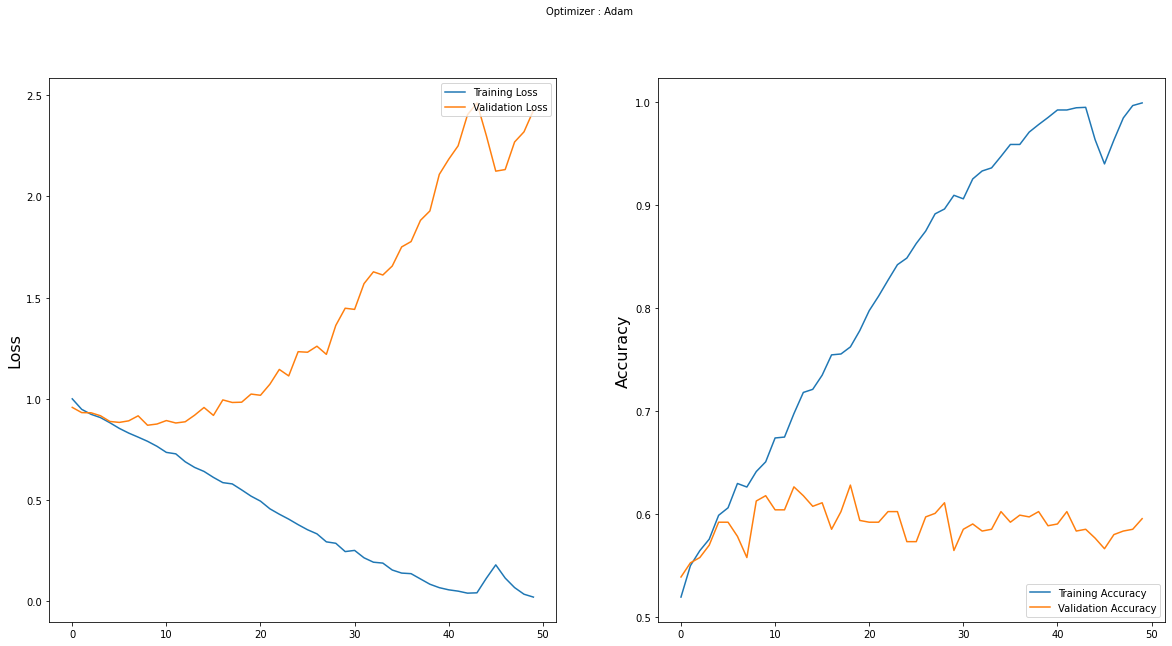

In [ ]:
plotter_single(history_tiny_model)

### Initial model with 25-dimensional embedding vector

In [ ]:
def tiny_model_with_reg(embedding_dim = 25, dropout_rate = 0.4, lambda_val = 1e-4, E_T=E_T_25d):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Dropout(dropout_rate)(x)

  x = Bidirectional(LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(x)

  x = Model(inputs=inputTweet, outputs=x)

  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Dropout(dropout_rate)(y)

  y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(y)

  y = Model(inputs=inputTarget, outputs=y)

  ##########################
  # Merging of Branches
  ##########################

  # combine the output of the two branches (with Multiplication)
  combined = tf.keras.layers.Concatenate()([x.output, y.output])



  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(combined)

  z = Dropout(dropout_rate)(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[x.input, y.input], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [ ]:
tiny_model_with_reg_train = tiny_model_with_reg()

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 50
BATCH_SIZE = 32
VERBOSE = 2
SHUFFLE = True

history_tiny_model_with_reg = tiny_model_with_reg_train.fit(
                              x=[tweet_lines_pad,target_lines_pad],
                              y=stance_list,
                              validation_split=VAL_SPLIT,
                              epochs=EPOCHS,
                              batch_size=BATCH_SIZE,
                              verbose=VERBOSE,
                              shuffle=SHUFFLE)

Epoch 1/50
73/73 [==============================] - 19s 263ms/step - loss: 1.0715 - accuracy: 0.4955 - val_loss: 1.0122 - val_accuracy: 0.5523
Epoch 2/50
73/73 [==============================] - 18s 253ms/step - loss: 1.0297 - accuracy: 0.5272 - val_loss: 0.9786 - val_accuracy: 0.5523
Epoch 3/50
73/73 [==============================] - 19s 254ms/step - loss: 1.0002 - accuracy: 0.5384 - val_loss: 0.9817 - val_accuracy: 0.5437
Epoch 4/50
73/73 [==============================] - 18s 253ms/step - loss: 0.9881 - accuracy: 0.5457 - val_loss: 0.9662 - val_accuracy: 0.5540
Epoch 5/50
73/73 [==============================] - 18s 252ms/step - loss: 0.9790 - accuracy: 0.5556 - val_loss: 0.9618 - val_accuracy: 0.5523
Epoch 6/50
73/73 [==============================] - 18s 251ms/step - loss: 0.9702 - accuracy: 0.5478 - val_loss: 0.9682 - val_accuracy: 0.5472
Epoch 7/50
73/73 [==============================] - 18s 250ms/step - loss: 0.9792 - accuracy: 0.5521 - val_loss: 0.9660 - val_accuracy: 0.5455

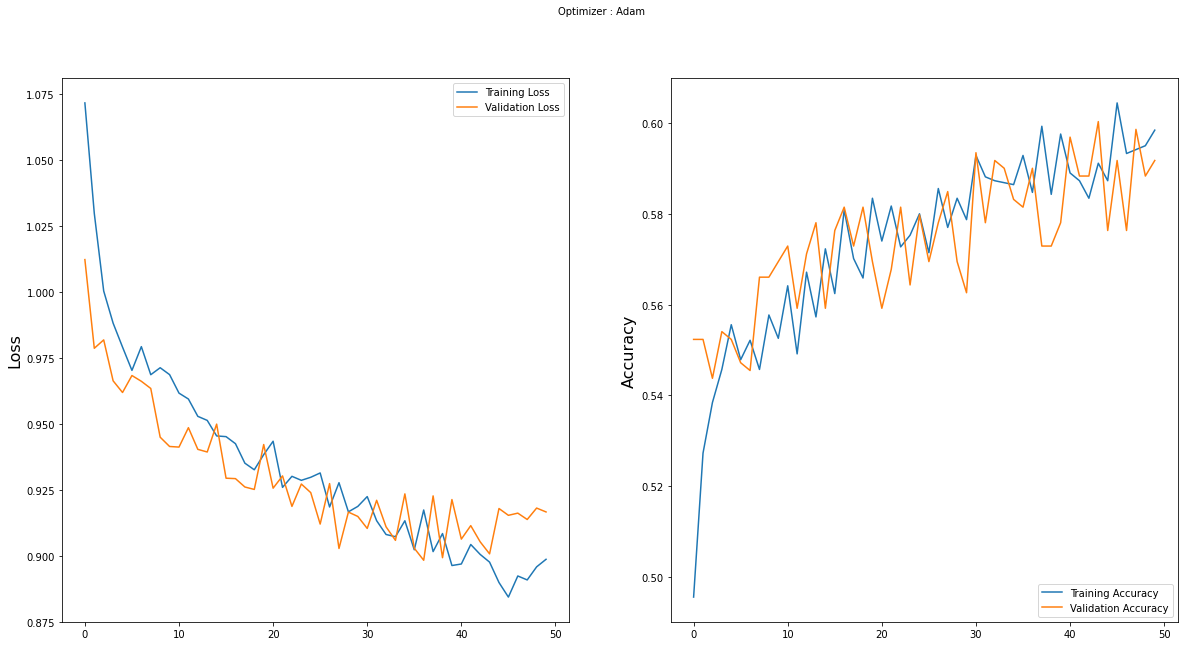

In [ ]:
plotter_single(history_tiny_model_with_reg)

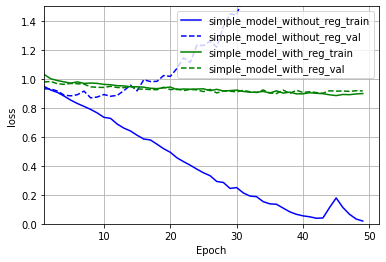

In [ ]:
histories = {}

histories["simple_model_without_reg"] = history_tiny_model
histories["simple_model_with_reg"] = history_tiny_model_with_reg
plotter(histories, ylim=[0.0,1.5])

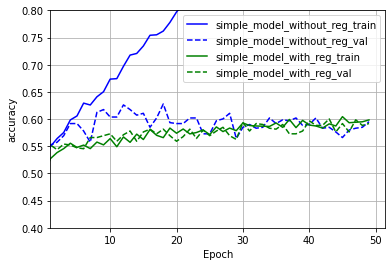

In [ ]:

plotter(histories,metric="accuracy", ylim=[0.4,0.8])

### Initial model with 100-dimensional embedding vector

In [ ]:
tiny_model_with_reg_100d_train = tiny_model_with_reg(embedding_dim=100, E_T=E_T_100d)

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 30
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

history_tiny_model_with_reg_100d = tiny_model_with_reg_100d_train.fit(
        x=[tweet_lines_pad,target_lines_pad],
        y=stance_list,
        validation_split=VAL_SPLIT,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        shuffle=SHUFFLE)

Epoch 1/30
73/73 [==============================] - 20s 268ms/step - loss: 1.0876 - accuracy: 0.4916 - val_loss: 1.0099 - val_accuracy: 0.5437
Epoch 2/30
73/73 [==============================] - 19s 254ms/step - loss: 1.0295 - accuracy: 0.5388 - val_loss: 0.9926 - val_accuracy: 0.5592
Epoch 3/30
73/73 [==============================] - 19s 254ms/step - loss: 1.0090 - accuracy: 0.5388 - val_loss: 0.9741 - val_accuracy: 0.5575
Epoch 4/30
73/73 [==============================] - 19s 254ms/step - loss: 0.9807 - accuracy: 0.5491 - val_loss: 0.9837 - val_accuracy: 0.5780
Epoch 5/30
73/73 [==============================] - 18s 252ms/step - loss: 0.9802 - accuracy: 0.5581 - val_loss: 0.9421 - val_accuracy: 0.5729
Epoch 6/30
73/73 [==============================] - 18s 253ms/step - loss: 0.9601 - accuracy: 0.5663 - val_loss: 0.9342 - val_accuracy: 0.5780
Epoch 7/30
73/73 [==============================] - 19s 257ms/step - loss: 0.9584 - accuracy: 0.5701 - val_loss: 0.9622 - val_accuracy: 0.5746

### Initial model with 200-dimensional embedding vector

In [ ]:
tiny_model_with_reg_200d_train = tiny_model_with_reg(embedding_dim=200, E_T=E_T_200d)

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 30
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

history_tiny_model_with_reg_200d = tiny_model_with_reg_200d_train.fit(
        x=[tweet_lines_pad,target_lines_pad],
        y=stance_list,
        validation_split=VAL_SPLIT,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        shuffle=SHUFFLE)

Epoch 1/30
73/73 [==============================] - 20s 270ms/step - loss: 1.0804 - accuracy: 0.5199 - val_loss: 1.0246 - val_accuracy: 0.5557
Epoch 2/30
73/73 [==============================] - 19s 259ms/step - loss: 1.0446 - accuracy: 0.5363 - val_loss: 1.0169 - val_accuracy: 0.5540
Epoch 3/30
73/73 [==============================] - 19s 258ms/step - loss: 1.0141 - accuracy: 0.5453 - val_loss: 0.9626 - val_accuracy: 0.5506
Epoch 4/30
73/73 [==============================] - 18s 253ms/step - loss: 0.9839 - accuracy: 0.5513 - val_loss: 0.9576 - val_accuracy: 0.5746
Epoch 5/30
73/73 [==============================] - 19s 256ms/step - loss: 0.9644 - accuracy: 0.5693 - val_loss: 0.9897 - val_accuracy: 0.5763
Epoch 6/30
73/73 [==============================] - 19s 256ms/step - loss: 0.9523 - accuracy: 0.5684 - val_loss: 0.9186 - val_accuracy: 0.6123
Epoch 7/30
73/73 [==============================] - 19s 255ms/step - loss: 0.9266 - accuracy: 0.5972 - val_loss: 0.9189 - val_accuracy: 0.6055

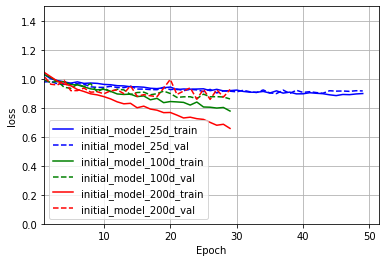

In [ ]:
histories = {}

histories['initial_model_25d'] = history_tiny_model_with_reg
histories['initial_model_100d'] = history_tiny_model_with_reg_100d
histories['initial_model_200d'] = history_tiny_model_with_reg_200d

plotter(histories, ylim=[0.0,1.5])

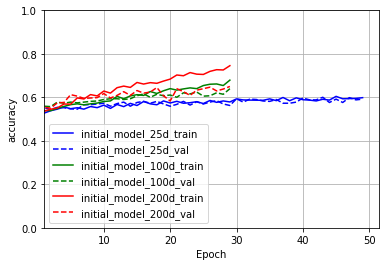

In [ ]:
plotter(histories,metric="accuracy", ylim=[0.0,1.0])

## Model #2: Multi-input RNN Model with Attention Layer

Attention layer source: https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
def model_with_attention(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 1e-4, E_T=E_T_25d):


  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Dropout(dropout_rate)(x)

  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=True, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(x)


  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Dropout(dropout_rate)(y)

  y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(y)



  ##########################
  # Attention Layer
  ##########################
  
  attention_output_1 = attention()(x)
  attention_output_2 = attention()(y)

  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply two FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_output_1)

  z = Dropout(dropout_rate)(z)
    
    
  q = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_output_2)

  q = Dropout(dropout_rate)(q)
    
    
  ##########################
  # Merging of Streams
  ##########################
    
  combined = Concatenate()([z,q])


  finalOutput = Dense(nb_classes, activation="softmax")(combined)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet, inputTarget], outputs=finalOutput)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [ ]:
model_with_attention_train = model_with_attention(embedding_dim=100, E_T=E_T_100d)

# Define Fitting Parameters
VAL_SPLIT = 0.25
EPOCHS = 80
BATCH_SIZE = 64
VERBOSE = 1
SHUFFLE = True

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, verbose=VERBOSE, mode='auto')

CALLBACKS = [early_stopping]


history_model_with_attention = model_with_attention_train.fit(
        x=[tweet_lines_pad,target_lines_pad],
        y=stance_list,
        validation_split=VAL_SPLIT,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        shuffle=SHUFFLE,
        callbacks=CALLBACKS)

Epoch 1/80
35/35 [==============================] - 4s 103ms/step - loss: 1.1090 - accuracy: 0.4888 - val_loss: 1.0622 - val_accuracy: 0.5514
Epoch 2/80
35/35 [==============================] - 3s 73ms/step - loss: 1.0492 - accuracy: 0.5423 - val_loss: 1.0277 - val_accuracy: 0.5514
Epoch 3/80
35/35 [==============================] - 2s 71ms/step - loss: 1.0255 - accuracy: 0.5487 - val_loss: 1.0036 - val_accuracy: 0.5514
Epoch 4/80
35/35 [==============================] - 2s 69ms/step - loss: 1.0049 - accuracy: 0.5474 - val_loss: 1.0066 - val_accuracy: 0.5501
Epoch 5/80
35/35 [==============================] - 2s 67ms/step - loss: 0.9943 - accuracy: 0.5524 - val_loss: 0.9694 - val_accuracy: 0.5583
Epoch 6/80
35/35 [==============================] - 2s 70ms/step - loss: 0.9768 - accuracy: 0.5570 - val_loss: 0.9572 - val_accuracy: 0.5789
Epoch 7/80
35/35 [==============================] - 2s 69ms/step - loss: 0.9595 - accuracy: 0.5739 - val_loss: 0.9961 - val_accuracy: 0.5652
Epoch 8/80
3

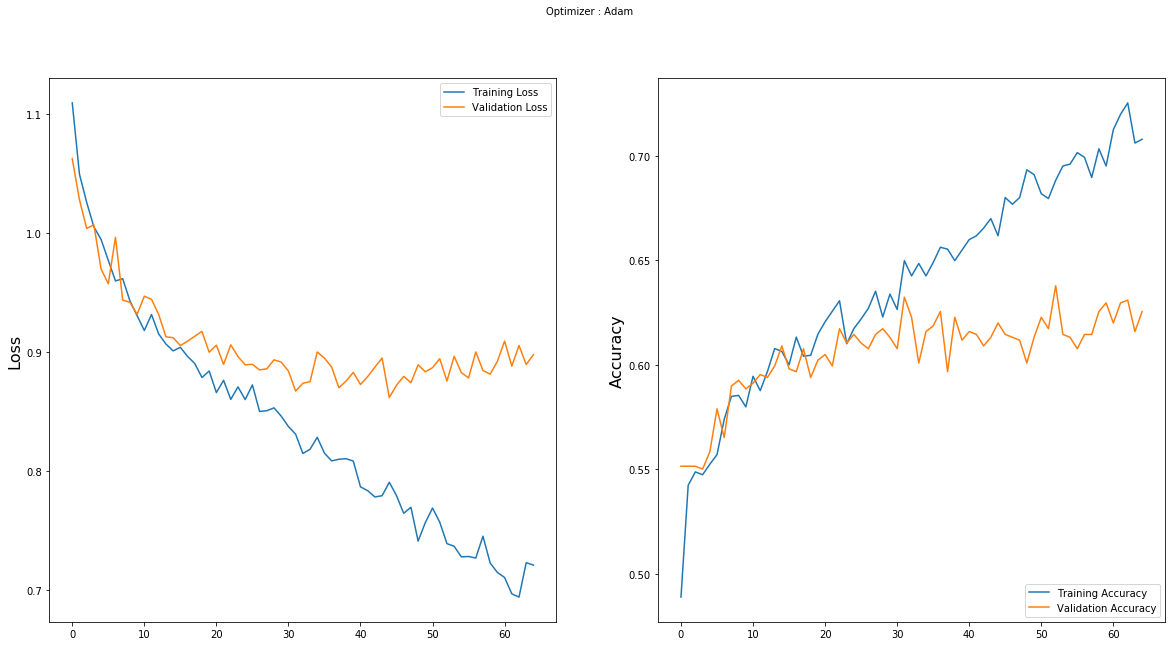

In [ ]:
plotter_single(history_model_with_attention)

## Model #3: Model with Tweet input conditioned with Target input

In [ ]:
def model_conditional_encoding(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.0025, E_T=E_T_100d, learning_rate=0.0004, batch_size = 32):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Encoder (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  x = Dropout(dropout_rate)(x)

  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # Second Encoder (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  tweet_encoder_out = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])

  ##########################
  # Attention Layer
  ##########################
  attention_out = attention()(tweet_encoder_out)


  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.


  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out)

  z = Dropout(dropout_rate)(z)

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)

  z = BatchNormalization()(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet,inputTarget ], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  #lr = learning_rate
  optimizer = optimizer_adam(lr=learning_rate, xtrain=tweet_lines_pad, batch_size = batch_size )
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [ ]:
model_conditional_encoding_train = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d)

# Define Fitting Parameters
VAL_SPLIT = 0.2


MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=8, verbose=VERBOSE, mode='auto', min_lr="0.0005")

CALLBACKS = [early_stopping, lr_reducer]


history_model_conditional_encoding = model_conditional_encoding_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
73/73 [==============================] - 16s 221ms/step - loss: 5.4437 - accuracy: 0.3754 - val_loss: 4.6155 - val_accuracy: 0.4700
Epoch 2/200
73/73 [==============================] - 16s 215ms/step - loss: 4.4569 - accuracy: 0.4663 - val_loss: 3.9736 - val_accuracy: 0.4700
Epoch 3/200
73/73 [==============================] - 15s 210ms/step - loss: 3.8596 - accuracy: 0.5036 - val_loss: 3.5370 - val_accuracy: 0.4700
Epoch 4/200
73/73 [==============================] - 15s 209ms/step - loss: 3.4263 - accuracy: 0.5354 - val_loss: 3.2062 - val_accuracy: 0.5249
Epoch 5/200
73/73 [==============================] - 15s 210ms/step - loss: 3.1267 - accuracy: 0.5504 - val_loss: 2.9409 - val_accuracy: 0.5472
Epoch 6/200
73/73 [==============================] - 15s 210ms/step - loss: 2.8799 - accuracy: 0.5628 - val_loss: 2.7231 - val_accuracy: 0.5489
Epoch 7/200
73/73 [==============================] - 15s 210ms/step - loss: 2.6668 - accuracy: 0.5641 - val_loss: 2.5318 - val_accuracy:

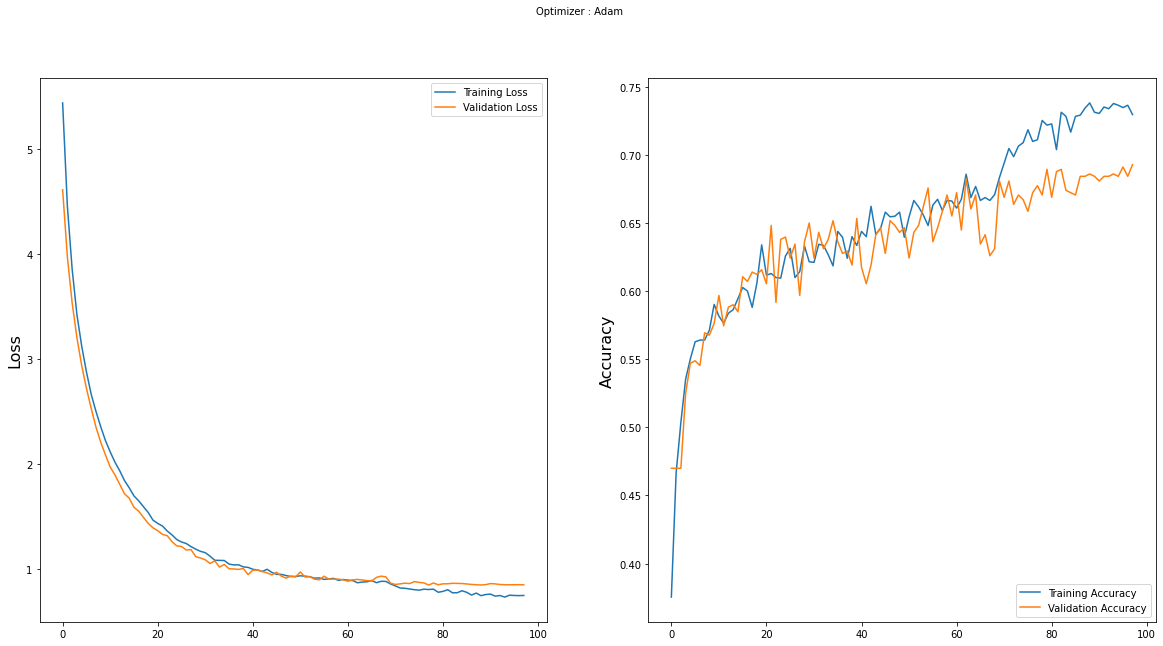

In [ ]:
plotter_single(history_model_conditional_encoding)

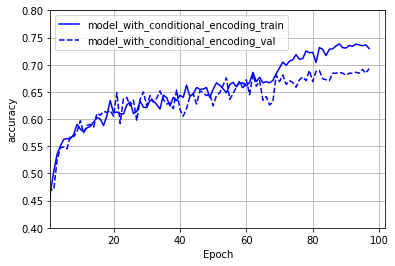

In [ ]:
histories = {}

histories["model_with_conditional_encoding"] = history_model_conditional_encoding

plotter(histories, metric="accuracy", ylim=[0.4,0.8])


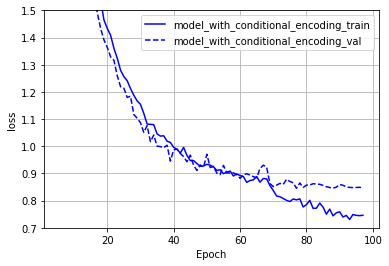

In [ ]:

plotter(histories, ylim=[0.7, 1.5])

## Model #4: Model with Target input conditioned with Tweet Input

In [ ]:
def model_conditional_encoding_reverse(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.0025, E_T=E_T_100d, learning_rate=0.0004, batch_size = 32):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Encoder (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Dropout(dropout_rate)(x)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (tweet_encoder, tweet_forward_h, tweet_forward_s, tweet_backward_h, tweet_backward_s) = tweet_encoder(x)



  ##########################
  # Second Encoder (Target)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Dropout(dropout_rate)(y)

  target_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  target_encoder_out = target_encoder(y, initial_state=[tweet_forward_h, tweet_forward_s, tweet_backward_h, tweet_backward_s])

  ##########################
  # Attention Layer
  ##########################
  attention_out = attention()(target_encoder_out)

  

  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  nb_classes = 3

  # apply two FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out)

  z = Dropout(dropout_rate)(z)

  z = BatchNormalization()(z)

  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)

  z = BatchNormalization()(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet,inputTarget], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  optimizer = optimizer_adam(lr=learning_rate, xtrain=tweet_lines_pad, batch_size = batch_size )
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [ ]:
model_conditional_encoding_reverse_train = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d)

# Define Fitting Parameters
VAL_SPLIT = 0.2


MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
#lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=8, verbose=VERBOSE, mode='auto', min_lr="0.0005")

CALLBACKS = [early_stopping]


history_model_conditional_encoding_reverse = model_conditional_encoding_reverse_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
73/73 [==============================] - 18s 253ms/step - loss: 5.4475 - accuracy: 0.3818 - val_loss: 4.6097 - val_accuracy: 0.4700
Epoch 2/200
73/73 [==============================] - 18s 241ms/step - loss: 4.4432 - accuracy: 0.4788 - val_loss: 3.9642 - val_accuracy: 0.4700
Epoch 3/200
73/73 [==============================] - 18s 242ms/step - loss: 3.8394 - accuracy: 0.5328 - val_loss: 3.5192 - val_accuracy: 0.5111
Epoch 4/200
73/73 [==============================] - 18s 241ms/step - loss: 3.4390 - accuracy: 0.5328 - val_loss: 3.1957 - val_accuracy: 0.5249
Epoch 5/200
73/73 [==============================] - 17s 239ms/step - loss: 3.1287 - accuracy: 0.5345 - val_loss: 2.9325 - val_accuracy: 0.5540
Epoch 6/200
73/73 [==============================] - 18s 241ms/step - loss: 2.8879 - accuracy: 0.5508 - val_loss: 2.7043 - val_accuracy: 0.5660
Epoch 7/200
73/73 [==============================] - 18s 244ms/step - loss: 2.6811 - accuracy: 0.5551 - val_loss: 2.5159 - val_accuracy:

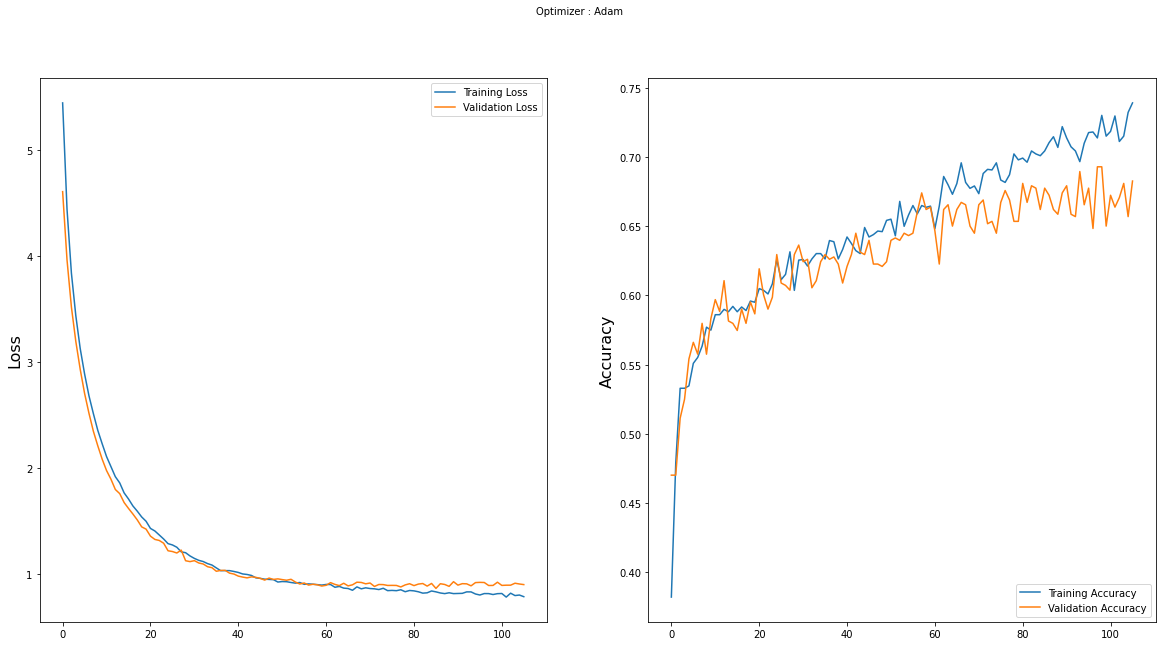

In [ ]:
plotter_single(history_model_conditional_encoding_reverse)

## Model #5: Model with double conditional encoding

In [ ]:
def model_double_conditional_encoding(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.003, E_T=E_T_25d):


  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Encoding (Target)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  x = Dropout(dropout_rate)(x)

  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # First Encoding (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False,
                                    return_state = True, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  (tweet_encoder, tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s) = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  ##########################
  # Second Encoding (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  a = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  a = Dropout(dropout_rate)(a)

  target_encoding_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding_2, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding_2(a,initial_state=[tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s])



  ##########################
  # Second Encoding (Target)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  b = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  b = Dropout(dropout_rate)(b)

  tweet_encoder_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  final_encoder_out = tweet_encoder_2(b, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  ##########################
  # Attention Layer
  ##########################

  attention_out = attention()(final_encoder_out)

  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  nb_classes = 3


  # apply two FC layers and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out)

  z = Dropout(dropout_rate)(z)

  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)
    
  z = BatchNormalization()(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet, inputTarget], outputs=z)

    ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.0005
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  

  return model


In [ ]:
model_double_conditional_encoding_train = model_double_conditional_encoding(embedding_dim=200, E_T = E_T_200d)

# Define Fitting Parameters
VAL_SPLIT = 0.2
MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, verbose=VERBOSE, mode='auto')

CALLBACKS = [early_stopping, lr_reducer]


history_model_double_conditional_encoding = model_double_conditional_encoding_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
73/73 [==============================] - 37s 513ms/step - loss: 8.0827 - accuracy: 0.4050 - val_loss: 5.9153 - val_accuracy: 0.4700
Epoch 2/200
73/73 [==============================] - 35s 485ms/step - loss: 5.1806 - accuracy: 0.4775 - val_loss: 4.2612 - val_accuracy: 0.4700
Epoch 3/200
73/73 [==============================] - 35s 486ms/step - loss: 3.9505 - accuracy: 0.5260 - val_loss: 3.5085 - val_accuracy: 0.4700
Epoch 4/200
73/73 [==============================] - 36s 487ms/step - loss: 3.3244 - accuracy: 0.5350 - val_loss: 3.0628 - val_accuracy: 0.4768
Epoch 5/200
73/73 [==============================] - 36s 489ms/step - loss: 2.9331 - accuracy: 0.5706 - val_loss: 2.7343 - val_accuracy: 0.5523
Epoch 6/200
73/73 [==============================] - 36s 492ms/step - loss: 2.6505 - accuracy: 0.5641 - val_loss: 2.4919 - val_accuracy: 0.5609
Epoch 7/200
73/73 [==============================] - 35s 484ms/step - loss: 2.4215 - accuracy: 0.5839 - val_loss: 2.2704 - val_accuracy:

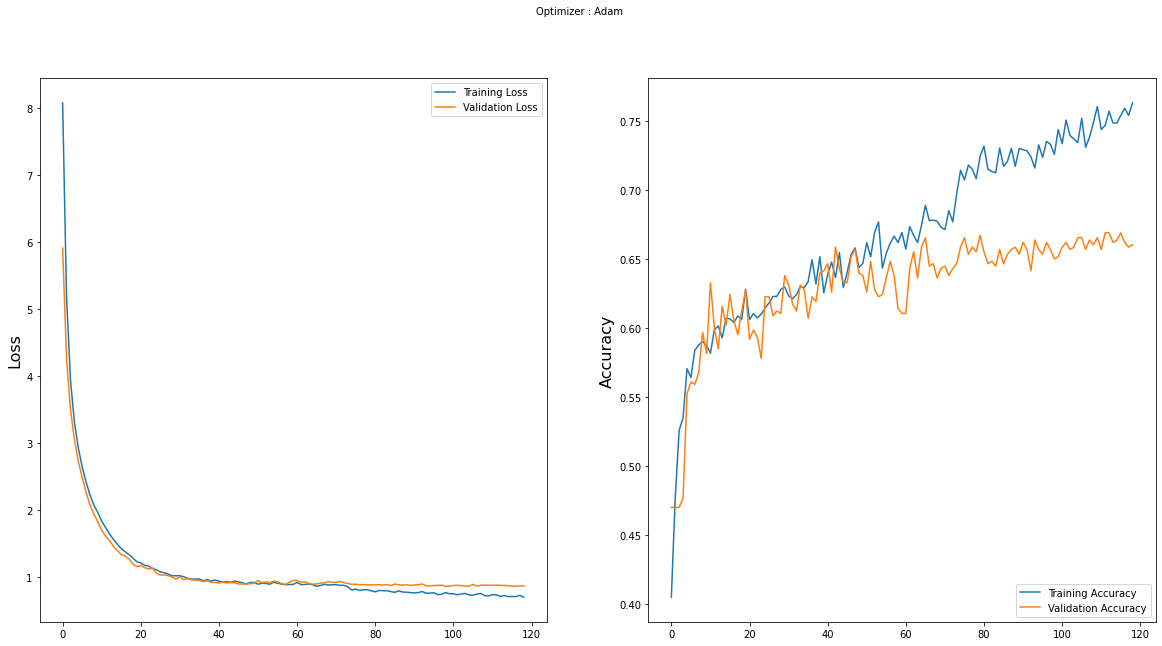

In [ ]:
plotter_single(history_model_double_conditional_encoding)

## Model #6: Model with two-way conditional encoding

In [ ]:
def model_bi_conditional_encoding(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.0025, learning_rate=0.00025, E_T = E_T_25d):
  
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Branch (Target)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  x = Dropout(dropout_rate)(x)

  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # First Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  first_encoder_out = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  ##########################
  # Second Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  a = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  a = Dropout(dropout_rate)(a)

  tweet_encoding_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (tweet_encoding_2, tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s) = tweet_encoding_2(a)



  ##########################
  # Second Branch (Target)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  b = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  b = Dropout(dropout_rate)(b)

  target_encoder_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  final_encoder_out = target_encoder_2(b, initial_state=[tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s])


  ##########################
  # Attention Layers
  ##########################

  attention_out_1 = attention()(first_encoder_out)
  attention_out_2 = attention()(final_encoder_out)

  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  nb_classes = 3


  # apply two FC layers before merging.
  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out_1)

  z = Dropout(dropout_rate)(z)

  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)

  z = BatchNormalization()(z)

  # apply two FC layers before merging.
  q = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out_2)

  q = Dropout(dropout_rate)(q)

  q = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(q)

  q = Dropout(dropout_rate)(q)

  q = BatchNormalization()(q)


  # Merge two branches.
  combined = tf.keras.layers.Concatenate()([z,q])


  final_output = Dense(nb_classes, activation="softmax")(combined)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[ inputTweet, inputTarget], outputs=final_output)

  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = learning_rate
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  

  return model

In [ ]:
model_bi_conditional_encoding_train = model_bi_conditional_encoding(embedding_dim=200, E_T = E_T_200d, learning_rate=0.0003)

# Define Fitting Parameters
VAL_SPLIT = 0.2
MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=8, verbose=VERBOSE, mode='auto', min_lr=0.0001)

CALLBACKS = [early_stopping, lr_reducer]


history_model_bi_conditional_encoding = model_bi_conditional_encoding_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
73/73 [==============================] - 35s 483ms/step - loss: 9.4172 - accuracy: 0.4063 - val_loss: 8.2218 - val_accuracy: 0.5523
Epoch 2/200
73/73 [==============================] - 34s 459ms/step - loss: 7.9109 - accuracy: 0.4689 - val_loss: 7.0617 - val_accuracy: 0.5523
Epoch 3/200
73/73 [==============================] - 33s 456ms/step - loss: 6.8708 - accuracy: 0.4908 - val_loss: 6.2352 - val_accuracy: 0.5523
Epoch 4/200
73/73 [==============================] - 33s 457ms/step - loss: 6.1641 - accuracy: 0.4989 - val_loss: 5.6179 - val_accuracy: 0.5523
Epoch 5/200
73/73 [==============================] - 34s 459ms/step - loss: 5.5735 - accuracy: 0.5036 - val_loss: 5.1269 - val_accuracy: 0.5523
Epoch 6/200
73/73 [==============================] - 33s 457ms/step - loss: 5.0948 - accuracy: 0.5212 - val_loss: 4.7280 - val_accuracy: 0.5557
Epoch 7/200
73/73 [==============================] - 33s 457ms/step - loss: 4.7179 - accuracy: 0.5393 - val_loss: 4.3864 - val_accuracy:

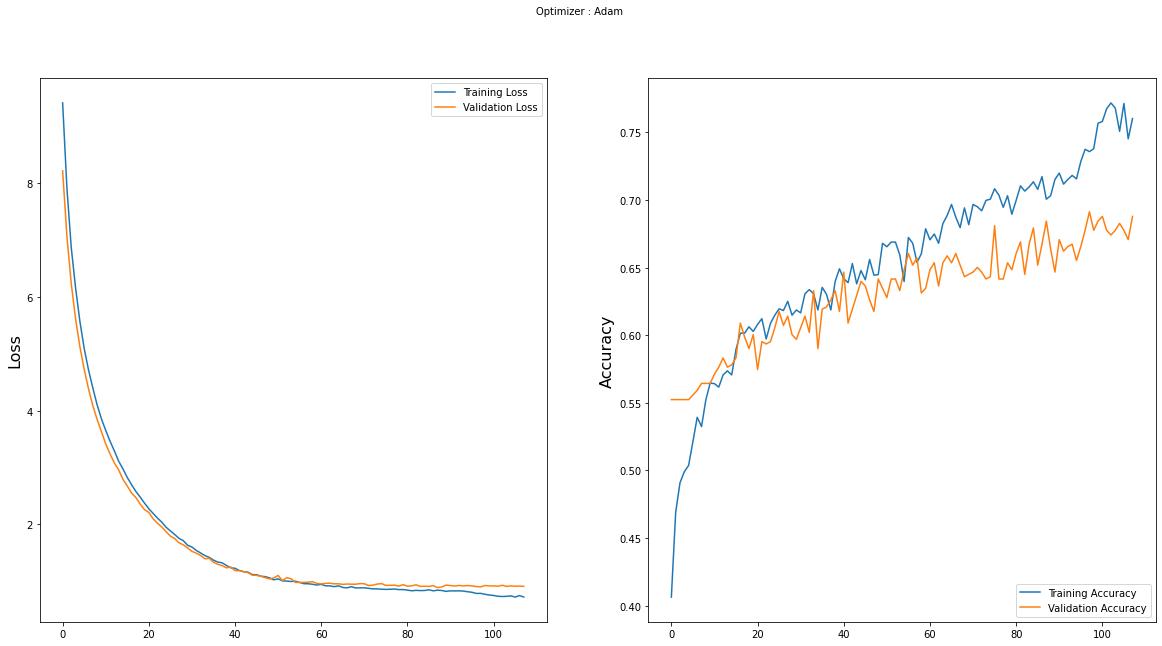

In [ ]:
plotter_single(history_model_bi_conditional_encoding)

## Hyperparameter Search

In this section, a grid search approach will be used to find the most optimal hyperparameters for the best model architecture designed in this notebook:

The hyperparameters that will be searched are (in order of importance):


*   Learning Rate (alpha)
*   Dropout Rate
*   L2 Regularization (lambda)
*   Batch Size



### Learning Rate

In [ ]:
h_alpha_histories = {}

# Learning Rate Values (Previously determined desired range).
alpha_vals = [0.001, 0.0004, 0.0002, 0.0001]

# Perform grid search.
for val in alpha_vals:

  # Define Fitting Parameters
  VAL_SPLIT = 0.2
  MAX_EPOCHS = 80
  BATCH_SIZE = 32
  VERBOSE = 1
  SHUFFLE = True

  # Define model
  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = val, batch_size=BATCH_SIZE)

  

  h_alpha_histories['model_ce_alpha'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

Epoch 1/80
73/73 [==============================] - 19s 257ms/step - loss: 4.7295 - accuracy: 0.4273 - val_loss: 3.6323 - val_accuracy: 0.4700
Epoch 2/80
73/73 [==============================] - 18s 245ms/step - loss: 3.2916 - accuracy: 0.5006 - val_loss: 2.8572 - val_accuracy: 0.4700
Epoch 3/80
73/73 [==============================] - 18s 246ms/step - loss: 2.6601 - accuracy: 0.5221 - val_loss: 2.4191 - val_accuracy: 0.4751
Epoch 4/80
73/73 [==============================] - 18s 245ms/step - loss: 2.2674 - accuracy: 0.5654 - val_loss: 2.1175 - val_accuracy: 0.5489
Epoch 5/80
73/73 [==============================] - 18s 244ms/step - loss: 1.9939 - accuracy: 0.5671 - val_loss: 1.9089 - val_accuracy: 0.4889
Epoch 6/80
73/73 [==============================] - 18s 244ms/step - loss: 1.7950 - accuracy: 0.5779 - val_loss: 1.7128 - val_accuracy: 0.5557
Epoch 7/80
73/73 [==============================] - 18s 245ms/step - loss: 1.6424 - accuracy: 0.5680 - val_loss: 1.5670 - val_accuracy: 0.5626

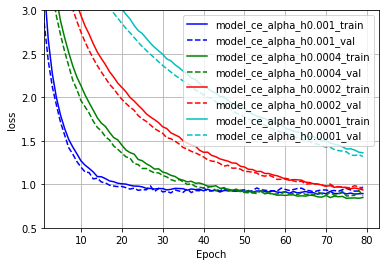

In [ ]:
plotter(h_alpha_histories, ylim=[0.5,3])

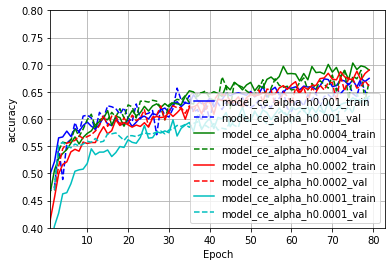

In [ ]:
plotter(h_alpha_histories, metric="accuracy", ylim=[0.4,0.8])

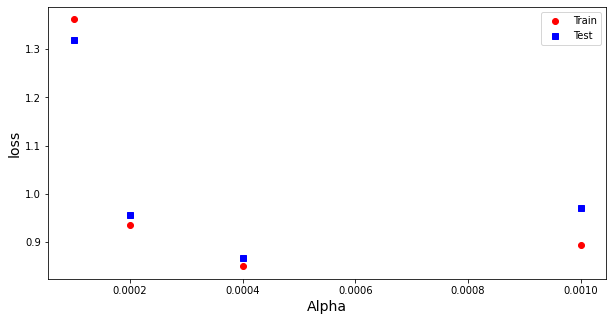

In [ ]:
compare_params(params_list=alpha_vals,h_histories=h_alpha_histories, param_name="Alpha", model_name="model_ce_alpha")

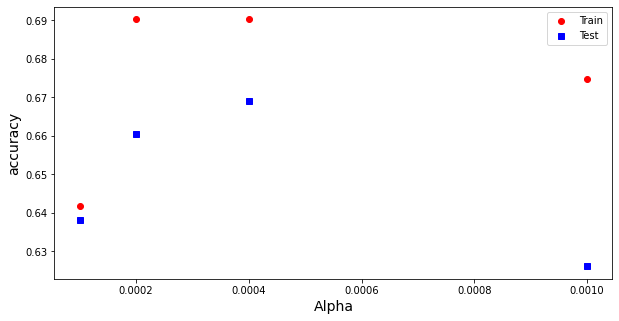

In [ ]:
compare_params(metric="accuracy",h_histories=h_alpha_histories, params_list=alpha_vals, param_name="Alpha", model_name="model_ce_alpha")

### Dropout Rate

In [ ]:
h_dropout_histories = {}

# Dropout values.
dropout_vals = [0.3, 0.4, 0.45, 0.55]

best_learning_rate = 0.0004

# Perform grid search.
for val in dropout_vals:

  # Define Fitting Parameters
  VAL_SPLIT = 0.2

  MAX_EPOCHS = 80
  BATCH_SIZE = 32
  VERBOSE = 1
  SHUFFLE = True

  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = best_learning_rate, dropout_rate = val, batch_size = BATCH_SIZE )

  

  h_dropout_histories['model_ce_dropout'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

Epoch 1/80
73/73 [==============================] - 19s 254ms/step - loss: 5.1149 - accuracy: 0.4324 - val_loss: 4.3757 - val_accuracy: 0.4700
Epoch 2/80
73/73 [==============================] - 18s 242ms/step - loss: 4.0047 - accuracy: 0.5109 - val_loss: 3.6255 - val_accuracy: 0.4700
Epoch 3/80
73/73 [==============================] - 18s 243ms/step - loss: 3.3626 - accuracy: 0.5444 - val_loss: 3.1482 - val_accuracy: 0.4768
Epoch 4/80
73/73 [==============================] - 18s 241ms/step - loss: 2.9372 - accuracy: 0.5693 - val_loss: 2.8165 - val_accuracy: 0.4837
Epoch 5/80
73/73 [==============================] - 18s 243ms/step - loss: 2.6191 - accuracy: 0.5920 - val_loss: 2.5481 - val_accuracy: 0.5729
Epoch 6/80
73/73 [==============================] - 18s 247ms/step - loss: 2.4054 - accuracy: 0.5963 - val_loss: 2.3419 - val_accuracy: 0.5780
Epoch 7/80
73/73 [==============================] - 18s 243ms/step - loss: 2.2239 - accuracy: 0.6002 - val_loss: 2.1678 - val_accuracy: 0.5695

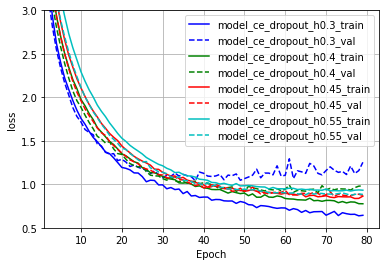

In [ ]:
plotter(h_dropout_histories, ylim=[0.5,3])

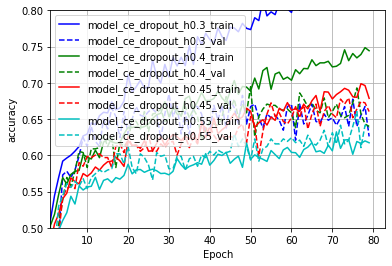

In [ ]:
plotter(h_dropout_histories,metric="accuracy", ylim=[0.5,0.8])

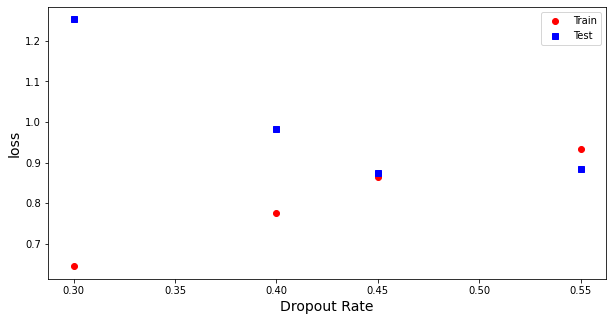

In [ ]:
compare_params(params_list=dropout_vals, h_histories=h_dropout_histories,param_name="Dropout Rate", model_name="model_ce_dropout")

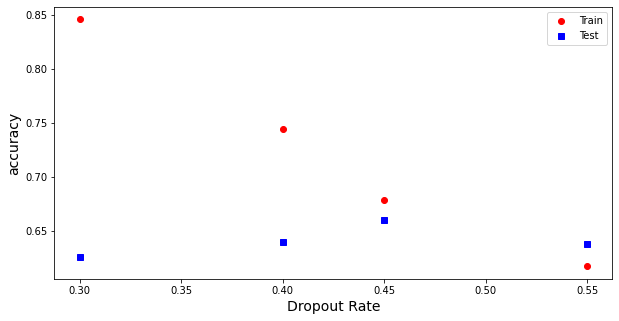

In [ ]:
compare_params(params_list=dropout_vals, h_histories=h_dropout_histories,param_name="Dropout Rate", model_name="model_ce_dropout", metric="accuracy")

### L2 Regularization

In [ ]:
h_lambda_histories = {}

# L2 regularization values.
lambda_vals = [0.001, 0.0025, 0.005, 0.01]

best_learning_rate = 0.0004
best_dropout_rate = 0.45

# Perform grid search.
for val in lambda_vals:
  # Define Fitting Parameters
  VAL_SPLIT = 0.2
  MAX_EPOCHS = 80
  BATCH_SIZE = 32
  VERBOSE = 1
  SHUFFLE = True

  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = best_learning_rate, dropout_rate=best_dropout_rate, lambda_val = val, batch_size = BATCH_SIZE)

  h_lambda_histories['model_ce_lambda'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

Epoch 1/80
73/73 [==============================] - 19s 261ms/step - loss: 2.9812 - accuracy: 0.3870 - val_loss: 2.6354 - val_accuracy: 0.4700
Epoch 2/80
73/73 [==============================] - 18s 246ms/step - loss: 2.6412 - accuracy: 0.4595 - val_loss: 2.4371 - val_accuracy: 0.4700
Epoch 3/80
73/73 [==============================] - 18s 246ms/step - loss: 2.4031 - accuracy: 0.5148 - val_loss: 2.2905 - val_accuracy: 0.4734
Epoch 4/80
73/73 [==============================] - 18s 245ms/step - loss: 2.2467 - accuracy: 0.5165 - val_loss: 2.1557 - val_accuracy: 0.5557
Epoch 5/80
73/73 [==============================] - 18s 245ms/step - loss: 2.1405 - accuracy: 0.5230 - val_loss: 2.0564 - val_accuracy: 0.5472
Epoch 6/80
73/73 [==============================] - 18s 246ms/step - loss: 2.0291 - accuracy: 0.5650 - val_loss: 1.9593 - val_accuracy: 0.5489
Epoch 7/80
73/73 [==============================] - 18s 245ms/step - loss: 1.9482 - accuracy: 0.5560 - val_loss: 1.8647 - val_accuracy: 0.5660

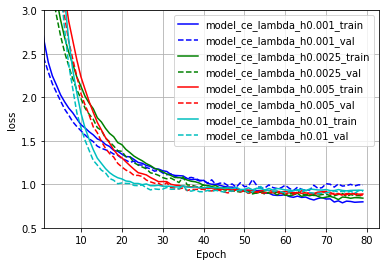

In [ ]:
plotter(h_lambda_histories, ylim=[0.5,3])

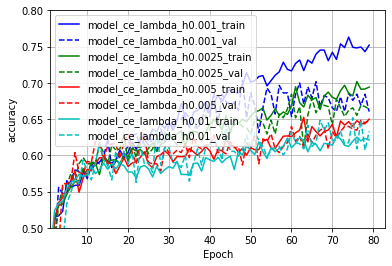

In [ ]:
plotter(h_lambda_histories,metric="accuracy", ylim=[0.5,0.8])

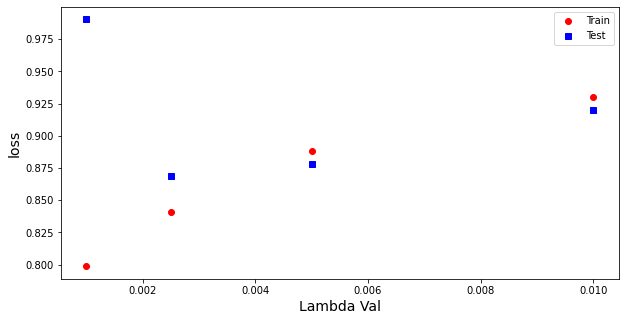

In [ ]:
compare_params(params_list=lambda_vals, h_histories=h_lambda_histories,param_name="Lambda Val", model_name="model_ce_lambda")

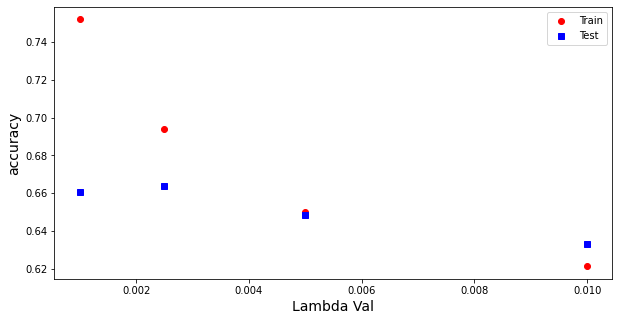

In [ ]:
compare_params(params_list=lambda_vals, h_histories=h_lambda_histories,param_name="Lambda Val", model_name="model_ce_lambda", metric="accuracy")

### Batch Size

In [ ]:
h_batch_histories = {}

# Learning Rate Values.
batch_vals = [16, 32, 64]

best_learning_rate = 0.0004
best_dropout_rate = 0.45
best_lambda_val = 0.0025

# Perform grid search.
for val in batch_vals:

  # Define Fitting Parameters
  VAL_SPLIT = 0.2

  MAX_EPOCHS = 50
  BATCH_SIZE = val
  VERBOSE = 1
  SHUFFLE = True

  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = best_learning_rate, dropout_rate= best_dropout_rate, lambda_val= best_lambda_val, batch_size = BATCH_SIZE )

  h_batch_histories['model_ce_batch'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

Epoch 1/50
146/146 [==============================] - 37s 253ms/step - loss: 5.1448 - accuracy: 0.4058 - val_loss: 4.2041 - val_accuracy: 0.4786
Epoch 2/50
146/146 [==============================] - 36s 246ms/step - loss: 3.9890 - accuracy: 0.4809 - val_loss: 3.4941 - val_accuracy: 0.5506
Epoch 3/50
146/146 [==============================] - 36s 246ms/step - loss: 3.3930 - accuracy: 0.5152 - val_loss: 3.0372 - val_accuracy: 0.5540
Epoch 4/50
146/146 [==============================] - 36s 245ms/step - loss: 2.9810 - accuracy: 0.5380 - val_loss: 2.6979 - val_accuracy: 0.5472
Epoch 5/50
146/146 [==============================] - 35s 243ms/step - loss: 2.6790 - accuracy: 0.5568 - val_loss: 2.4346 - val_accuracy: 0.5540
Epoch 6/50
146/146 [==============================] - 36s 243ms/step - loss: 2.4523 - accuracy: 0.5551 - val_loss: 2.2323 - val_accuracy: 0.5763
Epoch 7/50
146/146 [==============================] - 35s 241ms/step - loss: 2.2558 - accuracy: 0.5641 - val_loss: 2.0786 - val_ac

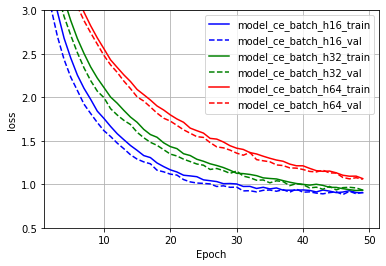

In [ ]:
plotter(h_batch_histories, ylim=[0.5,3])

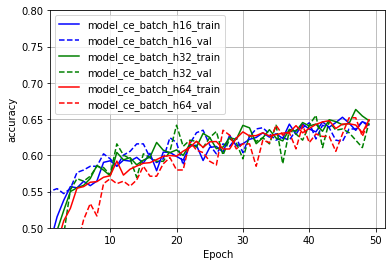

In [ ]:
plotter(h_batch_histories, metric="accuracy", ylim=[0.5,0.8])

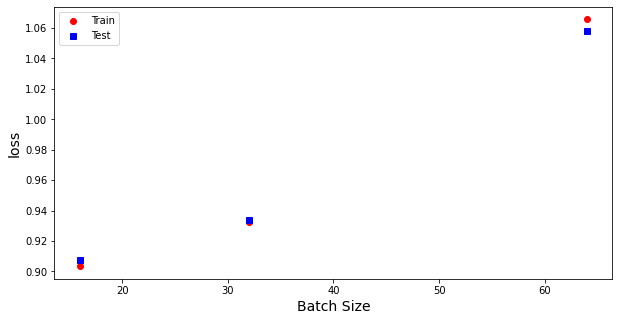

In [ ]:
compare_params(params_list=batch_vals, h_histories=h_batch_histories,param_name="Batch Size", model_name="model_ce_batch")

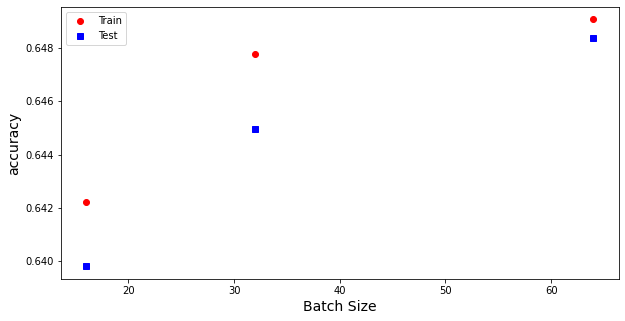

In [ ]:
compare_params(params_list=batch_vals, h_histories=h_batch_histories,param_name="Batch Size", model_name="model_ce_batch", metric="accuracy")